
# Compr√©hension du m√©tier



*   Dans le domaine de la reconnaissance des √©motions dans les signaux
audio, la clart√© et la pr√©cision de la transmission √©motionnelle sont d‚Äôune importance capitale.


*   
Les syst√®mes √©motionnellement intelligents sont de plus en plus pr√©cieux dans des secteurs tels que le service client, la surveillance de la sant√© mentale, l‚Äôinteraction homme-machine et les assistants virtuels personnalis√©s.

*  Pouvoir d√©tecter automatiquement l‚Äô√©tat √©motionnel d‚Äôun locuteur aide les entreprises √† am√©liorer l‚Äôexp√©rience utilisateur, √† adapter les services aux besoins individuels et √† r√©pondre de mani√®re plus empathique lors des interactions en temps r√©el.






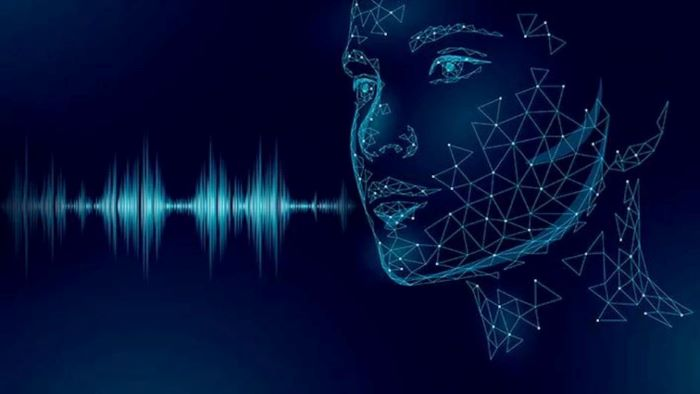

# Chargement des librairies

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
from torchvision import models
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from torchvision.models import resnet50, ResNet50_Weights
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive_new')

Mounted at /content/drive_new


# Compr√©hension des donn√©es

**Importation de Radvess √† partir du drive**


üé§ **RAVDESS** est une base de donn√©es audio-visuelle contenant des enregistrements vocaux et des performances chant√©es exprimant diff√©rentes √©motions.

üë• Elle est compos√©e d‚Äôenregistrements audio de 24 acteurs (12 hommes et 12 femmes) exprimant huit √©motions principales : neutre, calme, heureux, triste, en col√®re, effray√©, d√©go√ªt√© et surpris.

üìÇ Les fichiers audio sont en format WAV avec une fr√©quence d‚Äô√©chantillonnage standard (16 kHz ou 48 kHz selon la version).

**La Distribution des emotions dans Radvess**

*RAVDESS format :*

**Modality - Vocal channel - Emotion - Emotional intensity - Statement - Repetition - Actor**

üéôÔ∏è **Modality** : Type de donn√©es, par exemple vocal (speech) ou chant (song).

üîä**Vocal channel** : Canal audio utilis√©, souvent mono (1) ou st√©r√©o (2).

üòÉ **Emotion** : L‚Äô√©motion exprim√©e dans l‚Äôenregistrement (par exemple : neutre, calme, heureux, triste, en col√®re, effray√©, d√©go√ªt√©, surpris).

üìà**Emotional intensity** : Intensit√© de l‚Äô√©motion, souvent cod√©e (par exemple : faible ou forte).

üí¨ **Statement** : Le texte prononc√© dans l‚Äôenregistrement (RAVDESS contient un nombre limit√© de phrases standards).

üîÅ **Repetition**: Le num√©ro de r√©p√©tition de la phrase par l‚Äôacteur (exemple : premi√®re ou deuxi√®me fois).

üë§ **Actor** : Identifiant de l‚Äôacteur qui r√©alise l‚Äôenregistrement (par exemple acteur 01 √† 24).

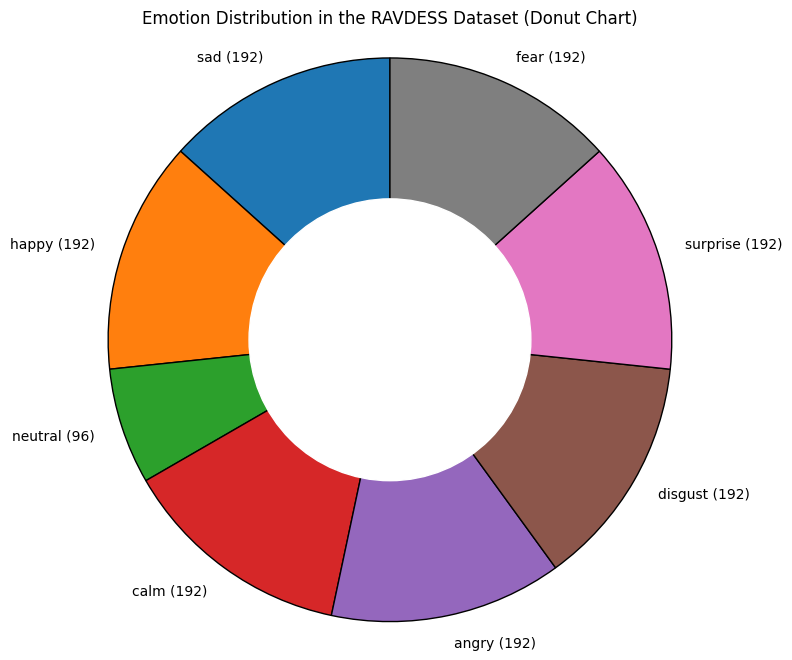

In [ ]:
import os
import matplotlib.pyplot as plt
from collections import Counter

# Dictionnaire des √©motions pour RAVDESS
emotion_codes = {
    '01': 'neutral',    # Neutre
    '02': 'calm',       # Calme
    '03': 'happy',      # Joie
    '04': 'sad',        # Tristesse
    '05': 'angry',      # Col√®re
    '06': 'fear',       # Peur
    '07': 'disgust',    # D√©go√ªt
    '08': 'surprise'    # Surprise
}

# Dossier contenant les sous-dossiers des acteurs
chemin = "/content/drive/MyDrive/RAVDESS"  # Remplace par le chemin r√©el

# Liste pour stocker les √©motions trouv√©es
emotions_found = []

# Parcours des sous-dossiers (acteurs)
for acteur in os.listdir(chemin):
    acteur_path = os.path.join(chemin, acteur)  # Chemin vers chaque sous-dossier d'acteur
    if os.path.isdir(acteur_path):  # V√©rifie si c'est un sous-dossier
        # Parcours des fichiers .wav dans chaque sous-dossier d'acteur
        for nom_fichier in os.listdir(acteur_path):
            if nom_fichier.endswith(".wav"):
                # Les codes des √©motions sont g√©n√©ralement dans les 6-7 premiers caract√®res du nom du fichier
                emotion_code = nom_fichier[6:8]  # Les 2 premiers caract√®res apr√®s l'ID de l'acteur
                emotion = emotion_codes.get(emotion_code, "inconnue")
                emotions_found.append(emotion)

# Compte des occurrences de chaque √©motion
emotion_counts = Counter(emotions_found)

# Pr√©paration des donn√©es pour le graphique
labels = list(emotion_counts.keys())
values = list(emotion_counts.values())

# Cr√©ation du graphique en anneau
plt.figure(figsize=(8, 8))

# Cr√©ation des labels avec le nombre d'√©chantillons
labels_with_counts = [f"{label} ({count})" for label, count in zip(labels, values)]

# Cr√©er le graphique en anneau
plt.pie(values, labels=labels_with_counts, startangle=90, wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'linestyle': 'solid'})

# Ajouter un cercle au centre pour faire un anneau
centre_circle = plt.Circle((0,0), 0.50, color='white', fc='white', linewidth=1)
plt.gca().add_artist(centre_circle)

# Titre
plt.title("Emotion Distribution in the RAVDESS Dataset (Donut Chart)")

# Affichage du graphique
plt.axis('equal')  # Pour s'assurer que l'anneau est bien circulaire
plt.show()


**Importation de EmodB √† partir de drive**

üéôÔ∏è**EmoDB,** provenant de l'Universit√© Technique de Berlin, est une base de donn√©es audio √©chantillonn√©e √† 16 kHz contenant des phrases en allemand.

üòêEmoDB comprend un ensemble de **sept √©motions** : neutre, joyeux, triste, en col√®re, peur, d√©go√ªt et ennui.

üé≠Ces √©motions sont exprim√©es **par 10 acteurs** professionnels allemands, r√©partis en **5 hommes** et **5 femmes**.

**La Distribution des emotions dans EmoDB**

*codes  des emotions dans EMODB:*

    - 'N': 'neutral'
    - 'F': 'happy'  
    - 'T': 'sad'     
    - 'W': 'angry'    
    - 'E': 'fear'      
    - 'A': 'disgust'   


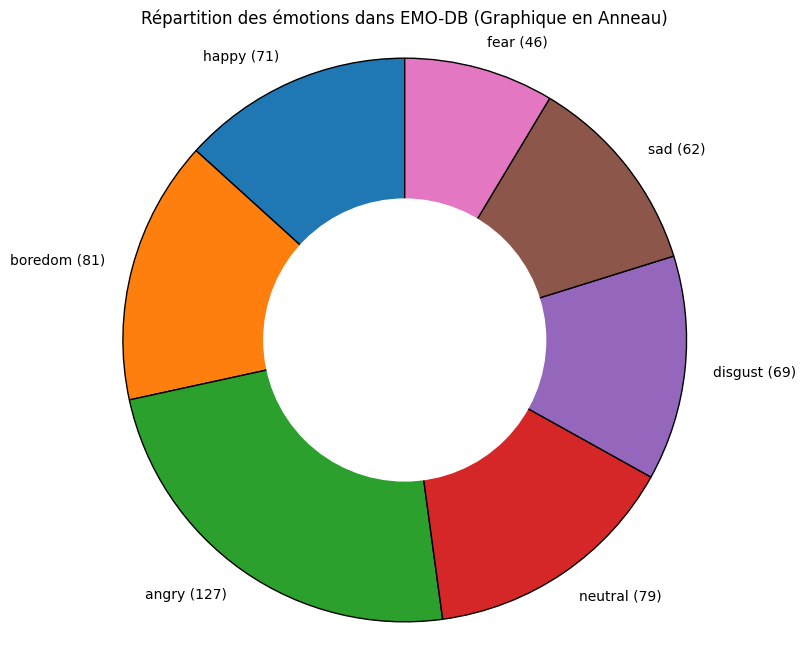

In [ ]:
import os
import matplotlib.pyplot as plt
from collections import Counter

# Dictionnaire des √©motions avec les mots demand√©s
emotion_codes = {
    'N': 'neutral',   # Neutre
    'F': 'happy',     # Joie
    'T': 'sad',       # Tristesse
    'W': 'angry',     # Col√®re
    'E': 'fear',      # Peur
    'A': 'disgust',   # D√©go√ªt
    'L': 'boredom'    # Ennui (ajout√© si n√©cessaire)
}

# Dossier contenant les fichiers audio
chemin = "/content/drive/MyDrive/EmoDB/wav"  # Remplace par le chemin r√©el

# Liste pour stocker les √©motions trouv√©es
emotions_found = []

# Parcours des fichiers
for nom_fichier in os.listdir(chemin):
    if nom_fichier.endswith(".wav"):
        emotion_code = nom_fichier[5]  # 6e caract√®re pour l'√©motion
        emotion = emotion_codes.get(emotion_code, "inconnue")
        emotions_found.append(emotion)

# Compte des occurrences de chaque √©motion
emotion_counts = Counter(emotions_found)

# Pr√©paration des donn√©es pour le graphique
labels = list(emotion_counts.keys())
values = list(emotion_counts.values())

# Cr√©ation du graphique en anneau
plt.figure(figsize=(8, 8))

# Cr√©ation des labels avec le nombre d'√©chantillons
labels_with_counts = [f"{label} ({count})" for label, count in zip(labels, values)]

# Cr√©er le graphique en anneau
plt.pie(values, labels=labels_with_counts, startangle=90, wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'linestyle': 'solid'})

# Ajouter un cercle au centre pour faire un anneau
centre_circle = plt.Circle((0,0), 0.50, color='white', fc='white', linewidth=1)
plt.gca().add_artist(centre_circle)

# Titre
plt.title("R√©partition des √©motions dans EMO-DB (Graphique en Anneau)")

# Affichage du graphique
plt.axis('equal')  # Pour s'assurer que l'anneau est bien circulaire
plt.show()


# Preparation des donn√©es

## 1. Fusion des 2 datasets

Pour augmenter la diversit√© et le volume des donn√©es d‚Äôentra√Ænement, nous avons fusionn√© les datasets RAVDESS et EmoDB en alignant leurs cat√©gories √©motionnelles communes. Bien que ces datasets diff√®rent par la langue (RAVDESS en anglais, EmoDB en allemand) et les conditions d‚Äôenregistrement, ils partagent un ensemble d‚Äô√©motions communes : neutre, joyeux, triste, en col√®re, peur et d√©go√ªt

In [ ]:
import os
import shutil

# Dictionnaire des √©motions pour RAVDESS
emotion_codes = {
    '01': 'neutral',    # Neutre
    '02': 'calm',       # Calme
    '03': 'happy',      # Joie
    '04': 'sad',        # Tristesse
    '05': 'angry',      # Col√®re
    '06': 'fear',       # Peur
    '07': 'disgust',    # D√©go√ªt
    '08': 'surprise'    # Surprise
}

# Dossier contenant les sous-dossiers des acteurs
chemin = "/content/drive/MyDrive/RAVDESS"  # Remplace par le chemin r√©el
destination_base = "/content/drive/MyDrive/MERGED_ONE"  # Dossier o√π les fichiers seront tri√©s

# Cr√©e le dossier de destination de base s'il n'existe pas
if not os.path.exists(destination_base):
    os.makedirs(destination_base)

# Parcours des sous-dossiers (acteurs)
for acteur in os.listdir(chemin):
    acteur_path = os.path.join(chemin, acteur)  # Chemin vers chaque sous-dossier d'acteur
    if os.path.isdir(acteur_path):  # V√©rifie si c'est un sous-dossier
        # Parcours des fichiers .wav dans chaque sous-dossier d'acteur
        for nom_fichier in os.listdir(acteur_path):
            if nom_fichier.endswith(".wav"):
                # Les codes des √©motions sont g√©n√©ralement dans les 6-7 premiers caract√®res du nom du fichier
                emotion_code = nom_fichier[6:8]  # Les 2 premiers caract√®res apr√®s l'ID de l'acteur
                emotion = emotion_codes.get(emotion_code, "inconnue")

                # Cr√©e le dossier pour l'√©motion si n√©cessaire
                emotion_folder = os.path.join(destination_base, emotion)
                if not os.path.exists(emotion_folder):
                    os.makedirs(emotion_folder)

                # D√©place le fichier dans le dossier associ√© √† l'√©motion
                source_file = os.path.join(acteur_path, nom_fichier)
                destination_file = os.path.join(emotion_folder, nom_fichier)
                shutil.move(source_file, destination_file)

                print(f"Moved: {nom_fichier} to {emotion_folder}")

print("Files have been successfully sorted.")


Moved: 03-01-04-02-01-01-20.wav to /content/drive/MyDrive/MERGED_ONE/sad
Moved: 03-01-03-02-02-02-20.wav to /content/drive/MyDrive/MERGED_ONE/happy
Moved: 03-01-04-01-02-02-20.wav to /content/drive/MyDrive/MERGED_ONE/sad
Moved: 03-01-01-01-02-02-20.wav to /content/drive/MyDrive/MERGED_ONE/neutral
Moved: 03-01-03-01-01-02-20.wav to /content/drive/MyDrive/MERGED_ONE/happy
Moved: 03-01-01-01-02-01-20.wav to /content/drive/MyDrive/MERGED_ONE/neutral
Moved: 03-01-03-01-01-01-20.wav to /content/drive/MyDrive/MERGED_ONE/happy
Moved: 03-01-04-01-01-01-20.wav to /content/drive/MyDrive/MERGED_ONE/sad
Moved: 03-01-02-02-02-02-20.wav to /content/drive/MyDrive/MERGED_ONE/calm
Moved: 03-01-02-02-01-02-20.wav to /content/drive/MyDrive/MERGED_ONE/calm
Moved: 03-01-02-02-01-01-20.wav to /content/drive/MyDrive/MERGED_ONE/calm
Moved: 03-01-02-02-02-01-20.wav to /content/drive/MyDrive/MERGED_ONE/calm
Moved: 03-01-03-02-01-02-20.wav to /content/drive/MyDrive/MERGED_ONE/happy
Moved: 03-01-02-01-02-01-20.wav

In [ ]:
import os
import shutil

# Dictionnaire des √©motions pour EMO-DB
emotion_codes_emo_db = {
    'W': 'angry',      # Col√®re
    'L': 'boredom',    # Ennui
    'E': 'fear',       # Peur
    'A': 'disgust',    # D√©go√ªt
    'F': 'happy',      # Joie
    'T': 'sad',        # Tristesse
    'N': 'neutral'     # Neutre
}

# Dossier contenant les fichiers audio de EMO-DB
chemin_emo_db = "/content/drive/MyDrive/EmoDB/wav"  # Remplace par le chemin r√©el
destination_base_emo_db = "/content/drive/MyDrive/MERGED_ONE"  # Dossier o√π les fichiers seront tri√©s

# Cr√©e le dossier de destination de base s'il n'existe pas
if not os.path.exists(destination_base_emo_db):
    os.makedirs(destination_base_emo_db)

# Parcours des fichiers audio dans le dossier EMO-DB
for nom_fichier in os.listdir(chemin_emo_db):
    if nom_fichier.endswith(".wav"):
        # Les codes des √©motions sont g√©n√©ralement dans le 6e caract√®re du nom du fichier
        emotion_code = nom_fichier[5]  # Le code √©motionnel se trouve g√©n√©ralement √† la position 5
        emotion = emotion_codes_emo_db.get(emotion_code, "inconnue")

        # Cr√©e le dossier pour l'√©motion si n√©cessaire
        emotion_folder = os.path.join(destination_base_emo_db, emotion)
        if not os.path.exists(emotion_folder):
            os.makedirs(emotion_folder)

        # D√©place le fichier dans le dossier associ√© √† l'√©motion
        source_file = os.path.join(chemin_emo_db, nom_fichier)
        destination_file = os.path.join(emotion_folder, nom_fichier)
        shutil.move(source_file, destination_file)

        print(f"Moved: {nom_fichier} to {emotion_folder}")

print("Files have been successfully sorted.")


Moved: 08a04Ff.wav to /content/drive/MyDrive/MERGED_ONE/happy
Moved: 03b02La.wav to /content/drive/MyDrive/MERGED_ONE/boredom
Moved: 08a07Wc.wav to /content/drive/MyDrive/MERGED_ONE/angry
Moved: 03a04Lc.wav to /content/drive/MyDrive/MERGED_ONE/boredom
Moved: 03a01Nc.wav to /content/drive/MyDrive/MERGED_ONE/neutral
Moved: 03b03Nb.wav to /content/drive/MyDrive/MERGED_ONE/neutral
Moved: 08b01Aa.wav to /content/drive/MyDrive/MERGED_ONE/disgust
Moved: 03b10Nc.wav to /content/drive/MyDrive/MERGED_ONE/neutral
Moved: 03b09Wa.wav to /content/drive/MyDrive/MERGED_ONE/angry
Moved: 08a02Fe.wav to /content/drive/MyDrive/MERGED_ONE/happy
Moved: 08a07Tb.wav to /content/drive/MyDrive/MERGED_ONE/sad
Moved: 03b01Wc.wav to /content/drive/MyDrive/MERGED_ONE/angry
Moved: 08a01Wc.wav to /content/drive/MyDrive/MERGED_ONE/angry
Moved: 03a05Wb.wav to /content/drive/MyDrive/MERGED_ONE/angry
Moved: 08a04Wc.wav to /content/drive/MyDrive/MERGED_ONE/angry
Moved: 08a07La.wav to /content/drive/MyDrive/MERGED_ONE/bore

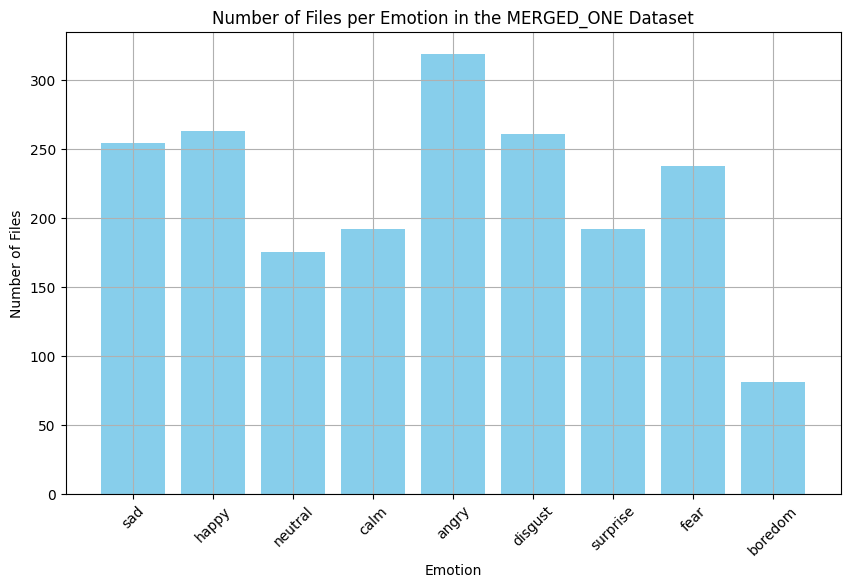

In [ ]:
import os
import matplotlib.pyplot as plt

# Dossier contenant les sous-dossiers d'√©motions dans MERGED_ONE
destination_base_emo_db = "/content/drive/MyDrive/MERGED_ONE"

# Dictionnaire pour stocker le nombre de fichiers pour chaque √©motion
emotion_counts = {}

# Parcours des sous-dossiers d'√©motions dans le dossier MERGED_ONE
for emotion_folder in os.listdir(destination_base_emo_db):
    emotion_path = os.path.join(destination_base_emo_db, emotion_folder)
    if os.path.isdir(emotion_path):
        # Compte le nombre de fichiers .wav dans chaque sous-dossier d'√©motion
        num_files = len([f for f in os.listdir(emotion_path) if f.endswith(".wav")])
        emotion_counts[emotion_folder] = num_files

# Visualisation des r√©sultats
plt.figure(figsize=(10, 6))
plt.bar(emotion_counts.keys(), emotion_counts.values(), color='skyblue')
plt.xlabel('Emotion')
plt.ylabel('Number of Files')
plt.title('Number of Files per Emotion in the MERGED_ONE Dataset')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Pretrainement des donn√©es



*   EmoDB a une fr√©quence d‚Äô√©chantillonnage de 16 kHz et RAVDESS de 48 kHz,nous avons donc r√©√©chantillonn√© les deux datasets √† 22 025 Hz.
*   Nous avons ajust√© la dur√©e des √©chantillons vocaux exprimant les √©motions en compl√©tant par du padding les fichiers les plus courts pour correspondre √† la longueur du plus long, afin que toutes les donn√©es aient une dur√©e uniforme de 10 secondes.
* Enfin, nous avons regroup√© et r√©organis√© les datasets selon chaque √©motion.

Toutes les donn√©es audio ont √©t√© converties en m√©l-spectrogrammes gr√¢ce √† la biblioth√®que Python librosa : le signal est trait√© comme une image, o√π du bruit est inject√© pendant le processus de diffusion et d‚Äôinversion, puis retir√©.

Pour √©viter la perte d‚Äôinformations temporelles, nous n‚Äôavons pas utilis√© la Transform√©e de Fourier Rapide (FFT), mais plut√¥t la Transform√©e de Fourier √† court terme (STFT) lors de la conversion.

Nous avons choisi un pas de saut (hop length) de 256 et une taille de fen√™tre (window size) de 1024 pour la STFT.

Une normalisation par Z-score a √©t√© appliqu√©e pour la standardisation des donn√©es.

##G√©n√©ration et sauvegarde de m√©l-spectrogrammes normalis√©s Z-score √† partir de fichiers audio cat√©goris√©s par √©motions

In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import gc  # Module pour forcer le nettoyage de la m√©moire

# Chemin d'entr√©e et de sortie
input_root = "/content/drive/MyDrive/MERGED_ONE"
output_root = "/content/drive/MyDrive/MelSpectrograms_MERGED_ONE"

# Liste des √©motions √† traiter
target_emotions = ["sad", "happy", "angry", "fear", "disgust", "neutral"]

# Param√®tres audio
duration_sec = 10
target_sr = 22025
target_length = duration_sec * target_sr

for emotion in target_emotions:
    emotion_path = os.path.join(input_root, emotion)

    if os.path.isdir(emotion_path):
        output_emotion_path = os.path.join(output_root, emotion)
        os.makedirs(output_emotion_path, exist_ok=True)

        for filename in os.listdir(emotion_path):
            if filename.endswith(".wav"):
                file_path = os.path.join(emotion_path, filename)
                output_img_path = os.path.join(output_emotion_path, f"{os.path.splitext(filename)[0]}.png")

                # Charger l'audio
                audio, sr = librosa.load(file_path, sr=target_sr)
                audio, _ = librosa.effects.trim(audio)

                # Centrage sur 6s
                if len(audio) < target_length:
                    padding_total = target_length - len(audio)
                    pad_left = padding_total // 2
                    pad_right = padding_total - pad_left
                    audio = np.pad(audio, (pad_left, pad_right), mode='constant')
                else:
                    audio = audio[:target_length]

                # M√©l-spectrogramme
                mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=1024,
                                                          hop_length=256, win_length=1024, n_mels=128)
                mel_db = librosa.power_to_db(mel_spec, ref=np.max)

                # Normalisation Z-score
                mean = np.mean(mel_db)
                std = np.std(mel_db)
                mel_db = (mel_db - mean) / std

                # Sauvegarde de l'image
                plt.figure(figsize=(10, 4))
                librosa.display.specshow(mel_db, sr=sr, hop_length=256, x_axis='time', y_axis='mel', cmap='magma')
                plt.colorbar(label='Z-score (dB)')
                plt.tight_layout()
                plt.savefig(output_img_path)
                plt.close()  # Fermeture de la figure pour lib√©rer la m√©moire

                # Nettoyage explicite de la m√©moire
                del mel_spec, mel_db, audio  # Supprimer les variables qui ne sont plus n√©cessaires
                gc.collect()  # Lib√©rer la m√©moire inutilis√©e

        print(f"Les m√©l-spectrogrammes normalis√©s pour '{emotion}' ont √©t√© g√©n√©r√©s et sauvegard√©s.")
    else:
        print(f"Le dossier '{emotion}' n'existe pas dans {input_root}.")


Les m√©l-spectrogrammes normalis√©s pour 'sad' ont √©t√© g√©n√©r√©s et sauvegard√©s.
Les m√©l-spectrogrammes normalis√©s pour 'happy' ont √©t√© g√©n√©r√©s et sauvegard√©s.
Les m√©l-spectrogrammes normalis√©s pour 'angry' ont √©t√© g√©n√©r√©s et sauvegard√©s.
Les m√©l-spectrogrammes normalis√©s pour 'fear' ont √©t√© g√©n√©r√©s et sauvegard√©s.
Les m√©l-spectrogrammes normalis√©s pour 'disgust' ont √©t√© g√©n√©r√©s et sauvegard√©s.


In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import gc  # Module pour forcer le nettoyage de la m√©moire

# Chemin d'entr√©e et de sortie
input_root = "/content/drive/MyDrive/MERGED_ONE"
output_root = "/content/drive/MyDrive/MelSpectrograms_MERGED_ONE"

# Liste des √©motions √† traiter
target_emotions = [ "neutral"]

# Param√®tres audio
duration_sec = 10
target_sr = 22025
target_length = duration_sec * target_sr

for emotion in target_emotions:
    emotion_path = os.path.join(input_root, emotion)

    if os.path.isdir(emotion_path):
        output_emotion_path = os.path.join(output_root, emotion)
        os.makedirs(output_emotion_path, exist_ok=True)

        for filename in os.listdir(emotion_path):
            if filename.endswith(".wav"):
                file_path = os.path.join(emotion_path, filename)
                output_img_path = os.path.join(output_emotion_path, f"{os.path.splitext(filename)[0]}.png")

                # Charger l'audio
                audio, sr = librosa.load(file_path, sr=target_sr)
                audio, _ = librosa.effects.trim(audio)

                # Centrage sur 6s
                if len(audio) < target_length:
                    padding_total = target_length - len(audio)
                    pad_left = padding_total // 2
                    pad_right = padding_total - pad_left
                    audio = np.pad(audio, (pad_left, pad_right), mode='constant')
                else:
                    audio = audio[:target_length]

                # M√©l-spectrogramme
                mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=1024,
                                                          hop_length=256, win_length=1024, n_mels=128)
                mel_db = librosa.power_to_db(mel_spec, ref=np.max)

                # Normalisation Z-score
                mean = np.mean(mel_db)
                std = np.std(mel_db)
                mel_db = (mel_db - mean) / std

                # Sauvegarde de l'image
                plt.figure(figsize=(10, 4))
                librosa.display.specshow(mel_db, sr=sr, hop_length=256, x_axis='time', y_axis='mel', cmap='magma')
                plt.colorbar(label='Z-score (dB)')
                plt.tight_layout()
                plt.savefig(output_img_path)
                plt.close()  # Fermeture de la figure pour lib√©rer la m√©moire

                # Nettoyage explicite de la m√©moire
                del mel_spec, mel_db, audio  # Supprimer les variables qui ne sont plus n√©cessaires
                gc.collect()  # Lib√©rer la m√©moire inutilis√©e

        print(f"Les m√©l-spectrogrammes normalis√©s pour '{emotion}' ont √©t√© g√©n√©r√©s et sauvegard√©s.")
    else:
        print(f"Le dossier '{emotion}' n'existe pas dans {input_root}.")


Les m√©l-spectrogrammes normalis√©s pour 'neutral' ont √©t√© g√©n√©r√©s et sauvegard√©s.


**Mel-spectrogram visualization**

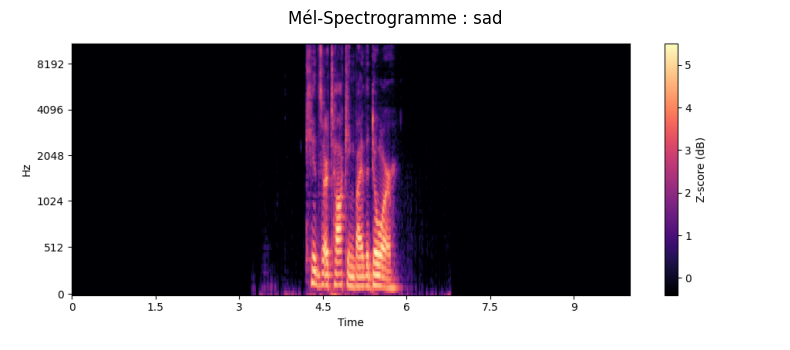

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Exemple : afficher une image g√©n√©r√©e pour l‚Äô√©motion "sad"
emotion = "sad"
base_path = "/content/drive/MyDrive/MelSpectrograms_MERGED_ONE"
image_name = "03-01-04-01-01-01-13.png"  # Remplace ce nom par l'un de ceux g√©n√©r√©s chez toi

# Chemin complet vers l'image
img_path = os.path.join(base_path, emotion, image_name)

# V√©rifier que le fichier existe
if os.path.isfile(img_path):
    # Lire et afficher l'image
    img = mpimg.imread(img_path)
    plt.figure(figsize=(10, 4))
    plt.imshow(img)
    plt.title(f"M√©l-Spectrogramme : {emotion}")
    plt.axis('off')
    plt.show()
else:
    print(f"Le fichier {img_path} n'existe pas.")


# Modelisation

## Resnet50

**G√©n√©ration d‚ÄôEmbeddings d‚Äô√âmotion :**
1. Les informations √©motionnelles ont √©t√© extraites √† partir d‚Äô√©nonc√©s typiques en utilisant des m√©l-spectrogrammes comme caract√©ristiques d‚Äôentr√©e. Ces spectrogrammes codent les caract√©ristiques fr√©quentielles de la parole, essentielles pour la d√©tection des √©motions.



2. Mod√®le de Classification des √âmotions :
Un mod√®le ResNet-50, impl√©ment√© avec PyTorch, a √©t√© utilis√© pour r√©aliser la classification. ResNet-50 est un r√©seau de neurones convolutionnel profond (CNN) particuli√®rement adapt√© √† l‚Äôextraction hi√©rarchique des caract√©ristiques audio.

**Les donn√©es d‚Äôentra√Ænement et de validation ont √©t√© divis√©es selon un ratio 80/20 pour l‚Äôentra√Ænement.**

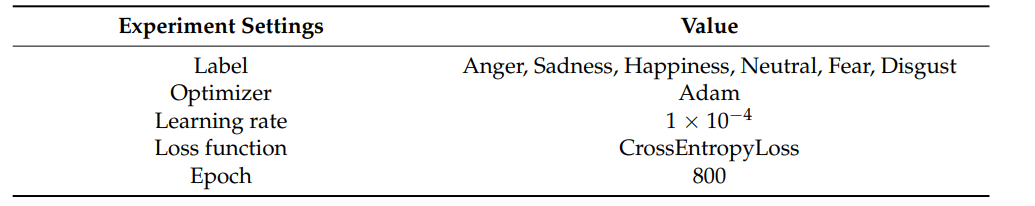

##Extraction des vecteurs d‚Äô√©motion √† partir des m√©l-spectrogrammes avec un mod√®le ResNet50 et entra√Ænement d‚Äôun classifieur d‚Äô√©motions vocales

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 97.8M/97.8M [00:01<00:00, 54.9MB/s]


[1/40] Loss: 1.7345 | Val Loss: 2.3049 | Val Acc: 0.1854 | F1: 0.0959
‚úÖ Meilleur mod√®le sauvegard√©.
[2/40] Loss: 1.1824 | Val Loss: 1.3772 | Val Acc: 0.4702 | F1: 0.4497
‚úÖ Meilleur mod√®le sauvegard√©.
[3/40] Loss: 0.7822 | Val Loss: 1.8494 | Val Acc: 0.4901 | F1: 0.4755
[4/40] Loss: 0.4706 | Val Loss: 1.3865 | Val Acc: 0.5695 | F1: 0.5657
[5/40] Loss: 0.2948 | Val Loss: 1.3180 | Val Acc: 0.6093 | F1: 0.6044
‚úÖ Meilleur mod√®le sauvegard√©.
[6/40] Loss: 0.1869 | Val Loss: 1.5683 | Val Acc: 0.5728 | F1: 0.5513
[7/40] Loss: 0.1453 | Val Loss: 1.4975 | Val Acc: 0.6159 | F1: 0.6099
[8/40] Loss: 0.1615 | Val Loss: 2.0580 | Val Acc: 0.5861 | F1: 0.5880
[9/40] Loss: 0.1199 | Val Loss: 1.8254 | Val Acc: 0.5728 | F1: 0.5692
[10/40] Loss: 0.1050 | Val Loss: 1.4903 | Val Acc: 0.6490 | F1: 0.6424
Early stopping d√©clench√©. Arr√™t de l'entra√Ænement.


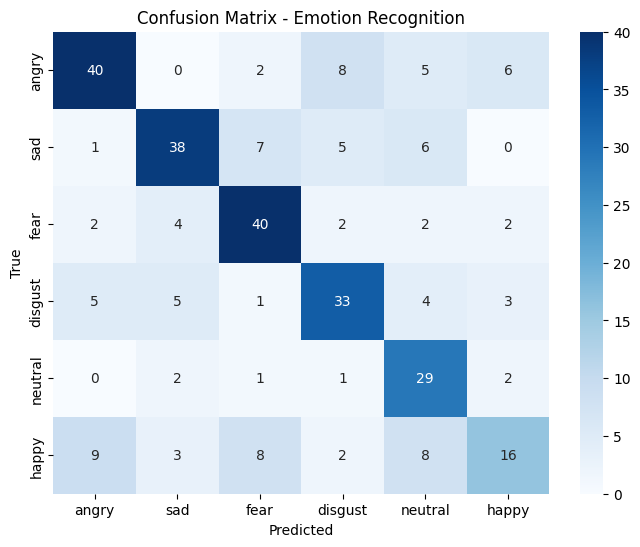


‚úÖ Fichier CSV 'emotion_vectors.csv' g√©n√©r√© avec 1510 vecteurs.


In [ ]:
import os
import csv
import torch
import torch.nn as nn
from torchvision import models, datasets, transforms
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionnaire des √©motions
emotion_to_index = {
    "angry": 0,
    "sad": 1,
    "fear": 2,
    "disgust": 3,
    "neutral": 4,
    "happy": 5
}

# Dataset personnalis√©
class SpectrogramDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.samples = []

        for emotion in os.listdir(root_dir):
            emotion_path = os.path.join(root_dir, emotion)
            if os.path.isdir(emotion_path):
                for fname in os.listdir(emotion_path):
                    if fname.endswith(".png"):
                        self.samples.append((os.path.join(emotion_path, fname), emotion_to_index[emotion]))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        image = Image.open(img_path).convert("L")
        if self.transform:
            image = self.transform(image)
        return image, label

# Mod√®le SER bas√© sur ResNet50
class SERResNet50(nn.Module):
    def __init__(self, num_classes=6):
        super(SERResNet50, self).__init__()
        self.base_model = models.resnet50(pretrained=True)
        self.base_model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        in_features = self.base_model.fc.in_features

        self.feature_extractor = nn.Sequential(*list(self.base_model.children())[:-1])
        self.classifier = nn.Sequential(
            nn.BatchNorm1d(in_features),
            nn.Dropout(0.5),  # Dropout ajout√© pour √©viter le sur-apprentissage
            nn.Linear(in_features, num_classes)
        )

    def forward(self, x):
        features = self.feature_extractor(x).squeeze()
        logits = self.classifier(features)
        return logits

    def extract_features(self, x):
        with torch.no_grad():
            features = self.feature_extractor(x).squeeze()
        return features

# Pr√©paration des donn√©es
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

dataset = SpectrogramDataset("/content/drive/MyDrive/MelSpectrograms_MERGED_ONE", transform=transform)

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Initialisation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SERResNet50(num_classes=6).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Early Stopping Initialization
best_val_loss = float('inf')
patience = 5  # Nombre d'√©poques sans am√©lioration
patience_counter = 0

# Entra√Ænement
for epoch in range(1, 41):
    model.train()
    total_loss = 0
    for x_batch, y_batch in train_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(x_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    # Validation
    model.eval()
    all_preds, all_labels = [], []
    val_loss = 0
    with torch.no_grad():
        for x_val, y_val in val_loader:
            x_val, y_val = x_val.to(device), y_val.to(device)
            outputs = model(x_val)
            loss = criterion(outputs, y_val)
            val_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y_val.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')

    print(f"[{epoch}/40] Loss: {total_loss / len(train_loader):.4f} | Val Loss: {val_loss / len(val_loader):.4f} | Val Acc: {acc:.4f} | F1: {f1:.4f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        # Sauvegarder le mod√®le avec la meilleure performance de validation
        torch.save(model.state_dict(), "/content/drive/MyDrive/emotion_recognition_best_model.pth")
        print("‚úÖ Meilleur mod√®le sauvegard√©.")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping d√©clench√©. Arr√™t de l'entra√Ænement.")
            break

# Matrice de confusion
cm = confusion_matrix(all_labels, all_preds)
labels = list(emotion_to_index.keys())
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Emotion Recognition")
plt.show()

# ‚úÖ Exporter les emotion vectors dans un CSV
output_csv = "emotion_vectors.csv"
model.eval()

with open(output_csv, mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['filepath', 'emotion_vector'])  # en-t√™tes

    for img_path, label in dataset.samples:
        image = Image.open(img_path).convert("L")
        image = transform(image).unsqueeze(0).to(device)
        vector = model.extract_features(image).cpu().numpy()  # (2048,)
        vector_str = " ".join(map(str, vector))
        writer.writerow([img_path, vector_str])

print(f"\n‚úÖ Fichier CSV 'emotion_vectors.csv' g√©n√©r√© avec {len(dataset)} vecteurs.")


##Extraction et sauvegarde des vecteurs d‚Äô√©motion depuis les m√©l-spectrogrammes √† l‚Äôaide du mod√®le pr√©-entra√Æn√© ResNet50

In [ ]:
import os
import csv
import torch
from PIL import Image
from torchvision import transforms

# Charger le mod√®le
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# D√©finir le mod√®le (assurez-vous que la classe SERResNet50 est d√©finie avant d'ex√©cuter ce code)
model = SERResNet50(num_classes=6).to(device)
model.load_state_dict(torch.load("/content/drive_new/MyDrive/emotion_recognition_best_model.pth"))
model.eval()

# Pr√©paration des donn√©es et transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Charger les spectrogrammes (ici on suppose que le chemin est correct pour vos spectrogrammes)
mel_dir = "/content/drive_new/MyDrive/MelSpectrograms_MERGED_ONE"  # Mettez √† jour ce chemin selon l'emplacement de vos images

# Liste pour stocker les embeddings des √©motions
data = []

# Passer √† travers les spectrogrammes et extraire les embeddings
with torch.no_grad():
    for emotion in os.listdir(mel_dir):
        emotion_path = os.path.join(mel_dir, emotion)
        if not os.path.isdir(emotion_path):
            continue
        for fname in os.listdir(emotion_path):
            if fname.endswith(".png"):
                img_path = os.path.join(emotion_path, fname)

                # Charger l'image et appliquer la transformation
                image = Image.open(img_path).convert("L")
                tensor = transform(image).unsqueeze(0).to(device)

                # Extraire les embeddings
                vector = model.extract_features(tensor).cpu().numpy()  # (2048,)

                # Ajouter les donn√©es
                data.append({
                    "filepath": img_path,
                    "emotion_vector": vector.tolist()
                })

# Sauvegarder les r√©sultats dans un fichier CSV
output_csv = "/content/drive_new/MyDrive/emotion_vectors.csv"
with open(output_csv, mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['filepath', 'emotion_vector'])  # En-t√™tes du CSV

    # √âcrire les lignes avec le chemin et l'embedding
    for row in data:
        writer.writerow([row["filepath"], " ".join(map(str, row["emotion_vector"]))])

print(f"\n‚úÖ Fichier CSV 'emotion_vectors.csv' g√©n√©r√© avec {len(data)} vecteurs.")



‚úÖ Fichier CSV 'emotion_vectors.csv' g√©n√©r√© avec 1510 vecteurs.


- Pour chaque m√©l-spectrogramme, nous avons sauvegard√© son chemin de fichier ainsi que le vecteur d‚Äôembedding √©motionnel correspondant dans un fichier CSV.

- Les scores finaux (une pr√©cision d‚Äôenviron 64 % et un F1 d‚Äôenviron 64 %) indiquent que le mod√®le montre une performance correcte avec une capacit√© de g√©n√©ralisation acceptable sur les donn√©es de validation.


## Mel-style encodeur


* Encodeur de style audio bas√© sur ResNet avec attention.

* Extrait un vecteur de style des m√©l-spectrogrammes gr√¢ce √† des blocs r√©siduels et des couches d'attention, capturant les caract√©ristiques importantes du signal.



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ResNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.skip = nn.Sequential()
        if in_channels != out_channels or stride != 1:
            self.skip = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        identity = self.skip(x)
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += identity
        return F.relu(out)

class SelfAttention(nn.Module):
    def __init__(self, in_dim):
        super().__init__()
        self.query = nn.Conv1d(in_dim, in_dim // 8, kernel_size=1)
        self.key = nn.Conv1d(in_dim, in_dim // 8, kernel_size=1)
        self.value = nn.Conv1d(in_dim, in_dim, kernel_size=1)
        self.gamma = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        # x: (B, C, H, W)
        B, C, H, W = x.shape
        x_flat = x.view(B, C, -1)  # (B, C, H*W)
        Q = self.query(x_flat)     # (B, C//8, H*W)
        K = self.key(x_flat)       # (B, C//8, H*W)
        V = self.value(x_flat)     # (B, C, H*W)

        attention = torch.bmm(Q.permute(0, 2, 1), K)  # (B, H*W, H*W)
        attention = F.softmax(attention, dim=-1)
        out = torch.bmm(V, attention)  # (B, C, H*W)
        out = out.view(B, C, H, W)

        return self.gamma * out + x

class MelStyleEncoder(nn.Module):
    def __init__(self, output_dim=128):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1)
        self.block1 = ResNetBlock(64, 128)
        self.attn1 = SelfAttention(128)
        self.block2 = ResNetBlock(128, 256)
        self.attn2 = SelfAttention(256)
        self.pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256, output_dim)  # vecteur de style final

    def forward(self, x):
        x = F.relu(self.conv1(x))       # (B, 64, H, W)
        x = self.block1(x)              # (B, 128, H, W)
        x = self.attn1(x)               # (B, 128, H, W)
        x = self.block2(x)              # (B, 256, H, W)
        x = self.attn2(x)               # (B, 256, H, W)
        x = self.pool(x).squeeze(-1).squeeze(-1)  # (B, 256)
        return self.fc(x)               # (B, output_dim)




* Extraction des vecteurs de style audio √† partir des m√©l-spectrogrammes.

* Le mod√®le MelStyleEncoder g√©n√®re un vecteur de style 128D pour chaque image,
puis les vecteurs et leurs chemins sont sauvegard√©s dans un fichier CSV.



In [ ]:
import os
import torch
import pandas as pd
from PIL import Image
from torchvision import transforms

# Chemin vers les images
mel_dir = "/content/drive_new/MyDrive/MelSpectrograms_MERGED_ONE"
model = MelStyleEncoder(output_dim=128).to("cpu")
model.eval()

# Transformation
transform = transforms.Compose([
    transforms.Resize((64, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Liste pour stocker les donn√©es
data = []

with torch.no_grad():
    for emotion in os.listdir(mel_dir):
        emotion_path = os.path.join(mel_dir, emotion)
        if not os.path.isdir(emotion_path):
            continue
        for fname in os.listdir(emotion_path):
            if fname.endswith(".png"):
                img_path = os.path.join(emotion_path, fname)
                image = Image.open(img_path).convert("L")
                tensor = transform(image).unsqueeze(0)
                vec = model(tensor).squeeze().numpy()
                data.append({
                    "path": img_path,
                    "vector": vec.tolist()
                })

# Sp√©cifier l'emplacement dans Google Drive
output_dir = "/content/drive/MyDrive/mel_style_vectors"  # Change ceci pour le dossier voulu sur ton Drive
os.makedirs(output_dir, exist_ok=True)  # Cr√©er le dossier si il n'existe pas

# Sauvegarder en CSV dans Google Drive
output_csv = os.path.join(output_dir, "mel_style_vectors.csv")
df = pd.DataFrame(data)
df.to_csv(output_csv, index=False)

print(f"‚úÖ CSV sauvegard√© dans {output_csv}.")


‚úÖ CSV sauvegard√© dans /content/drive_new/MyDrive/mel_style_vectors/mel_style_vectors.csv.


**Exemple d'un Mel-style vecteur**

In [ ]:
from PIL import Image
from PIL import Image
import torch
from torchvision import transforms


transform = transforms.Compose([
    transforms.Resize((64, 128)),  # ‚¨ÖÔ∏è taille r√©duite (au lieu de 128x862)
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])
# Charger une image m√©l-spectrogramme
image_path = "/content/drive_new/MyDrive/MelSpectrograms_MERGED_ONE/angry/03-01-05-01-01-01-01.png"
image = Image.open(image_path).convert("L")
mel_tensor = transform(image).unsqueeze(0)  # (1, 1, 64, 128)

# Cr√©er le mod√®le
model = MelStyleEncoder(output_dim=128).to("cpu")  # ou "cuda" si tu veux tester sur GPU
model.eval()

# Extraire le vecteur
with torch.no_grad():
    vec = model(mel_tensor)
    print("‚úÖ Vecteur de style (shape):", vec.shape)
    print(vec)


‚úÖ Vecteur de style (shape): torch.Size([1, 128])
tensor([[ 0.0378,  0.0398,  0.0133, -0.0872,  0.0688,  0.0062, -0.0314, -0.0125,
          0.0560,  0.0258, -0.0490, -0.1542,  0.0646,  0.0910,  0.0081, -0.0714,
          0.0658, -0.0415, -0.0680,  0.0037, -0.0039, -0.1099,  0.0650, -0.0472,
          0.0585, -0.0409, -0.0175, -0.0783,  0.0679,  0.0786,  0.0495,  0.0351,
         -0.0273,  0.0262,  0.0145,  0.0411,  0.0096, -0.0095,  0.0303, -0.0020,
          0.1309, -0.0703,  0.1732, -0.0254,  0.0864,  0.0027,  0.0553, -0.0200,
          0.0512, -0.0517, -0.0060,  0.0045, -0.0493,  0.1201, -0.0296, -0.0877,
         -0.0149, -0.0260, -0.0020,  0.0875,  0.0318,  0.0169, -0.0223,  0.0372,
         -0.0213, -0.0208,  0.0608, -0.0707, -0.0068,  0.0777,  0.1324,  0.0011,
         -0.0226,  0.0351, -0.0777, -0.0017,  0.0516, -0.0769, -0.0559, -0.0414,
         -0.1342,  0.0421, -0.0428, -0.0105, -0.0363,  0.0871,  0.0268,  0.0945,
         -0.0197,  0.0606,  0.0216,  0.0267,  0.0284, -0.0

## Entr√©e Conditionnelle


* Ajout d‚Äôune description textuelle des √©motions aux vecteurs de style audio.

* On extrait l‚Äô√©motion depuis le chemin du fichier, puis on associe un texted√©crivant chaque √©motion. Le r√©sultat est sauvegard√© dans un nouveau fichier CSV.



In [ ]:
import pandas as pd

# Charger le CSV d'origine
df = pd.read_csv('/content/drive_new/MyDrive/mel_style_vectors/mel_style_vectors.csv')

# Dictionnaire pour associer les √©motions √† leur description textuelle
emotion_to_text = {
    "angry": "A person speaking with irritation and frustration",
    "happy": "An utterance filled with joy and excitement",
    "sad": "A voice expressing sorrow or melancholy",
    "fear": "An anxious or worried tone, as if afraid",
    "disgust": "A tone reflecting revulsion or distaste",
    "neutral": "A voice without strong emotional expression, plain and factual."
}

# Fonction pour extraire l'√©motion depuis le chemin du fichier
def extract_emotion(path):
    return path.split('/')[-2]  # r√©cup√®re l'avant-dernier √©l√©ment du chemin

# Appliquer la fonction pour cr√©er la colonne 'emotion'
df['emotion'] = df['path'].apply(extract_emotion)

# Associer le text condition depuis le dictionnaire
df['text_condition'] = df['emotion'].map(emotion_to_text)

# Renommer la colonne 'path' en 'filepath'
df.rename(columns={'path': 'filepath'}, inplace=True)

# Sauvegarder la nouvelle copie du CSV
df.to_csv('/content/drive_new/MyDrive/mel_style_vectors_text_conditions.csv', index=False)

print("‚úÖ Fichier mis √† jour avec succ√®s !")

‚úÖ Fichier mis √† jour avec succ√®s !


In [ ]:
df1 = pd.read_csv('/content/drive_new/MyDrive/mel_style_vectors_text_conditions.csv')
df1.head()

filepath  \
0  /content/drive_new/MyDrive/MelSpectrograms_MER...   
1  /content/drive_new/MyDrive/MelSpectrograms_MER...   
2  /content/drive_new/MyDrive/MelSpectrograms_MER...   
3  /content/drive_new/MyDrive/MelSpectrograms_MER...   
4  /content/drive_new/MyDrive/MelSpectrograms_MER...   

                                              vector emotion  \
0  [-0.07511784136295319, 0.059011317789554596, -...     sad   
1  [-0.07363061606884003, 0.05730997771024704, -0...     sad   
2  [-0.07262888550758362, 0.05643601715564728, -0...     sad   
3  [-0.07364119589328766, 0.05760890245437622, -0...     sad   
4  [-0.07438206672668457, 0.05805334448814392, -0...     sad   

                            text_condition  
0  A voice expressing sorrow or melancholy  
1  A voice expressing sorrow or melancholy  
2  A voice expressing sorrow or melancholy  
3  A voice expressing sorrow or melancholy  
4  A voice expressing sorrow or melancholy

##Encodage des descriptions √©motionnelles avec BERT

* Ce code convertit les descriptions textuelles des √©motions en vecteurs num√©riques gr√¢ce au mod√®le BERT, pour enrichir les donn√©es utilis√©es dans le projet. Les r√©sultats sont sauvegard√©s dans un fichier CSV.

In [ ]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from tqdm import tqdm

# Charger le CSV enrichi avec text_condition
df = pd.read_csv('/content/drive_new/MyDrive/mel_style_vectors_text_conditions.csv')

# Charger BERT (tokenizer + mod√®le)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
model.eval()

# D√©sactiver le calcul de gradient (plus rapide)
@torch.no_grad()
def get_text_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    outputs = model(**inputs)
    # Moyenne sur les tokens
    embedding = outputs.last_hidden_state.mean(dim=1).squeeze().tolist()  # liste de floats
    return embedding

# Encodage BERT pour chaque ligne
tqdm.pandas()  # pour barre de progression
df['text_embedding'] = df['text_condition'].progress_apply(get_text_embedding)

# Sauvegarder le r√©sultat final
df.to_csv('/content/drive_new/MyDrive/mel_style_vectors_text_embedded.csv', index=False)

print("‚úÖ Fichier final sauvegard√© avec les embeddings BERT !")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1510/1510 [02:59<00:00,  8.43it/s]


‚úÖ Fichier final sauvegard√© avec les embeddings BERT !


## Modele de Diffusion

* Le mod√®le de diffusion est un mod√®le d‚ÄôIA g√©n√©rative qui produit des m√©l-spectrogrammes √† partir des entr√©es conditionnelles de l‚Äôutilisateur : vecteur de style m√©l, vecteur d‚Äô√©motion et bruit.

* Le processus de g√©n√©ration consiste √† injecter puis extraire le bruit pour cr√©er les r√©sultats demand√©s par l‚Äôutilisateur.

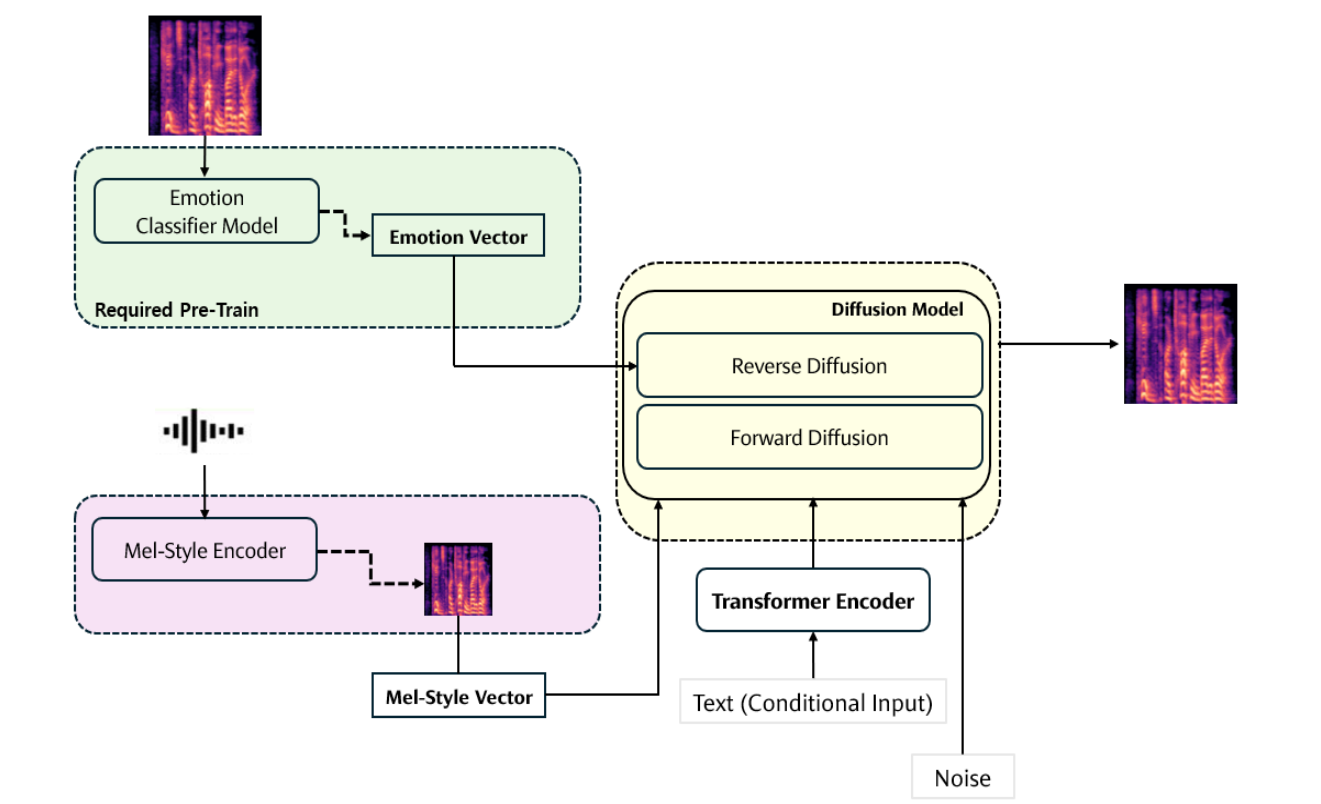

###Entra√Ænement d'un mod√®le Diffusion U-Net avec sauvegarde de checkpoints et g√©n√©ration de m√©l-spectrogrammes

Epoch 1/50, Loss: 0.2057676060056245
Epoch 2/50, Loss: 0.06045342772883713
Epoch 3/50, Loss: 0.04298879926600469
Epoch 4/50, Loss: 0.03600318706224835
Epoch 5/50, Loss: 0.03154912354454162
Epoch 6/50, Loss: 0.02987239439355791
Epoch 7/50, Loss: 0.02960584346678049
Epoch 8/50, Loss: 0.028260034075371487
Epoch 9/50, Loss: 0.024097349903689176
Epoch 10/50, Loss: 0.024572632566252084
Epoch 11/50, Loss: 0.02550538288301261
Epoch 12/50, Loss: 0.02230499789276451
Epoch 13/50, Loss: 0.01946399265299083
Epoch 14/50, Loss: 0.021904763519251472
Epoch 15/50, Loss: 0.022726599651847094
Epoch 16/50, Loss: 0.01922706384753818
Epoch 17/50, Loss: 0.019253774762902624
Epoch 18/50, Loss: 0.018397813357373394
Epoch 19/50, Loss: 0.01950212782150302
Epoch 20/50, Loss: 0.019956535886401536
Epoch 21/50, Loss: 0.018058929883101316
Epoch 22/50, Loss: 0.018292332962451
Epoch 23/50, Loss: 0.017217028378533623
Epoch 24/50, Loss: 0.01719724869345704
Epoch 25/50, Loss: 0.016511536964644042
Epoch 26/50, Loss: 0.01564

ValueError: For X (81) and Y (2) with flat shading, A should have shape (1, 80, 3) or (1, 80, 4) or (1, 80) or (80,), not (1, 80, 861)

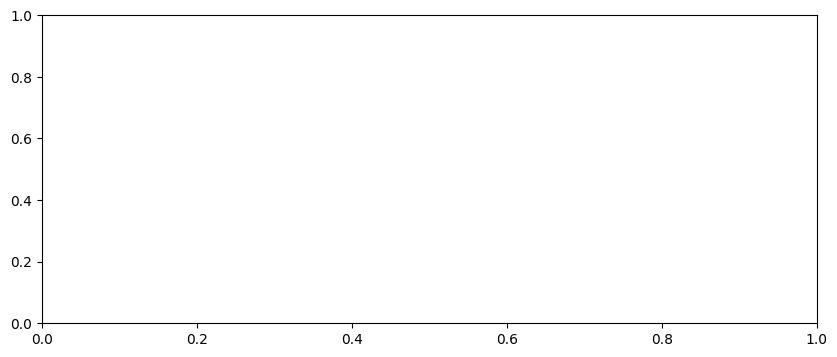

In [7]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import pandas as pd
import numpy as np
from ast import literal_eval
from PIL import Image
import matplotlib.pyplot as plt
import librosa.display
from torchvision import transforms
from torch.amp import autocast, GradScaler  # Updated import

# Set expandable segments to reduce memory fragmentation
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# Sinusoidal Position Embeddings for Time Steps
class SinusoidalPositionEmbeddings(nn.Module):
    def __init__(self, embedding_dim):
        super().__init__()
        self.embedding_dim = embedding_dim

    def forward(self, timesteps):
        half_dim = self.embedding_dim // 2
        emb = math.log(10000) / (half_dim - 1)
        emb = torch.exp(torch.arange(half_dim, device=timesteps.device) * -emb)
        emb = timesteps[:, None] * emb[None, :]
        emb = torch.cat([torch.sin(emb), torch.cos(emb)], dim=-1)
        return emb

# ResNet Block
class ResNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.skip = nn.Sequential()
        if in_channels != out_channels or stride != 1:
            self.skip = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        identity = self.skip(x)
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += identity
        return F.relu(out)

# Condition Projector
class ConditionProjector(nn.Module):
    def __init__(self, input_dim, target_dim):
        super().__init__()
        self.fc = nn.Linear(input_dim, target_dim)
        self.act = nn.ReLU()

    def forward(self, x):
        return self.act(self.fc(x))

# Diffusion U-Net Model (Corrected)
class DiffusionUNet(nn.Module):
    def __init__(self, cond_dim=768, mel_style_dim=128, emotion_dim=2048, time_emb_dim=128):
        super().__init__()
        self.time_embed = SinusoidalPositionEmbeddings(time_emb_dim)
        self.fc_time = nn.Linear(time_emb_dim, 128)

        self.fc_mel_style = ConditionProjector(mel_style_dim, 128)
        self.fc_text = ConditionProjector(cond_dim, 128)
        self.fc_emotion = ConditionProjector(emotion_dim, 128)

        self.input_conv = nn.Conv2d(1, 128, kernel_size=3, padding=1)  # [B, 1, 80, 861] -> [B, 128, 80, 861]

        # Downsampling path
        self.res1 = ResNetBlock(128, 128, stride=1)  # [B, 128, 80, 861]
        self.down1 = nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1)  # [B, 256, 40, 430]
        self.res2 = ResNetBlock(256, 512, stride=1)  # [B, 512, 40, 430]

        # Upsampling path
        self.up1 = nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, output_padding=(0, 1))  # [B, 256, 80, 861]
        self.res3 = ResNetBlock(256, 256, stride=1)  # [B, 256, 80, 861]
        self.up2 = nn.ConvTranspose2d(256, 128, kernel_size=3, stride=1, padding=1)  # [B, 128, 80, 861]
        self.res4 = ResNetBlock(128, 128, stride=1)  # [B, 128, 80, 861]

        self.out_conv = nn.Conv2d(128, 1, kernel_size=3, padding=1)  # [B, 1, 80, 861]

    def forward(self, x, t, mel_style_vector, text_vector, emotion_vector=None, reverse_phase=False):
        t_emb = self.fc_time(self.time_embed(t))
        mel_style_emb = self.fc_mel_style(mel_style_vector)
        text_emb = self.fc_text(text_vector)

        if reverse_phase and emotion_vector is not None:
            emotion_emb = self.fc_emotion(emotion_vector)
            global_emb = t_emb + mel_style_emb + text_emb + emotion_emb
        else:
            global_emb = t_emb + mel_style_emb + text_emb

        global_emb = global_emb[:, :, None, None]
        h = self.input_conv(x)
        h = h + global_emb

        h = self.res1(h)
        h = self.down1(h)
        h = self.res2(h)
        h = self.up1(h)
        h = self.res3(h)
        h = self.up2(h)
        h = self.res4(h)
        out = self.out_conv(h)
        return out

# Forward Diffusion Process
def forward_diffusion_sample(x0, t, betas):
    noise = torch.randn_like(x0)
    sqrt_alpha_cumprod = torch.sqrt(torch.cumprod(1.0 - betas, dim=0)).to(x0.device)
    sqrt_one_minus_alpha_cumprod = torch.sqrt(1.0 - torch.cumprod(1.0 - betas, dim=0)).to(x0.device)
    xt = sqrt_alpha_cumprod[t][:, None, None, None] * x0 + sqrt_one_minus_alpha_cumprod[t][:, None, None, None] * noise
    return xt, noise

# Beta Schedule
def make_beta_schedule(T=1000, start=1e-4, end=0.02):
    return torch.linspace(start, end, T)

# Reverse Diffusion Sampling
def reverse_diffusion_sample(model, x_t, t, mel_style_vector, text_vector, emotion_vector, betas, T, device):
    model.eval()
    with torch.no_grad():
        for i in reversed(range(0, t)):
            t_tensor = torch.full((x_t.shape[0],), i, dtype=torch.long, device=device)
            with autocast('cuda'):  # Updated to torch.amp
                predicted_noise = model(x_t, t_tensor, mel_style_vector, text_vector, emotion_vector, reverse_phase=True)
            alpha = 1.0 - betas[i]
            alpha_cumprod = torch.cumprod(1.0 - betas[:i+1], dim=0)[-1]
            x_t = (1.0 / torch.sqrt(alpha)) * (x_t - ((1.0 - alpha) / torch.sqrt(1.0 - alpha_cumprod)) * predicted_noise)
            if i > 0:
                x_t += torch.sqrt(betas[i]) * torch.randn_like(x_t)
    return x_t

# Load Data
def load_data(mel_style_csv, emotion_csv, mel_spectrogram_dir, save_tensors=True):
    mel_df = pd.read_csv(mel_style_csv)
    mel_df['vector'] = mel_df['vector'].apply(literal_eval)
    mel_df['text_embedding'] = mel_df['text_embedding'].apply(literal_eval)

    emotion_df = pd.read_csv(emotion_csv)
    emotion_df['emotion_vector'] = emotion_df['emotion_vector'].apply(lambda x: list(map(float, x.split())))

    mel_spectrograms = []
    transform = transforms.Compose([
        transforms.Resize((80, 861)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ])

    for path in mel_df['filepath'].tolist():
        pt_path = path.replace('.png', '.pt')
        if os.path.exists(pt_path):
            mel_tensor = torch.load(pt_path, map_location='cpu')
        else:
            image = Image.open(path).convert("L")
            mel_tensor = transform(image)
            if save_tensors:
                torch.save(mel_tensor, pt_path)
        mel_spectrograms.append(mel_tensor)

    mel_spectrograms = torch.stack(mel_spectrograms)
    mel_style_vectors = torch.tensor(mel_df['vector'].tolist())
    text_embeddings = torch.tensor(mel_df['text_embedding'].tolist())
    emotion_vectors = torch.tensor(emotion_df['emotion_vector'].tolist())

    return mel_spectrograms, mel_style_vectors, text_embeddings, emotion_vectors

# Training Loop with Mixed Precision and Gradient Accumulation
def train_diffusion_model(model, mel_spectrograms, mel_style_vectors, text_embeddings, emotion_vectors, betas, T, epochs, batch_size, device, accum_steps=4):
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    scaler = GradScaler('cuda')  # Updated to torch.amp
    dataset = torch.utils.data.TensorDataset(mel_spectrograms, mel_style_vectors, text_embeddings, emotion_vectors)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    for epoch in range(epochs):
        total_loss = 0
        optimizer.zero_grad()
        for i, batch in enumerate(dataloader):
            x0, mel_style, text_emb, emotion = batch
            x0, mel_style, text_emb, emotion = x0.to(device), mel_style.to(device), text_emb.to(device), emotion.to(device)

            t = torch.randint(0, T, (x0.shape[0],), device=device)
            x_t, noise = forward_diffusion_sample(x0, t, betas)

            with autocast('cuda'):  # Updated to torch.amp
                predicted_noise = model(x_t, t, mel_style, text_emb, emotion, reverse_phase=False)
                loss = F.mse_loss(predicted_noise, noise)

            loss = loss / accum_steps
            scaler.scale(loss).backward()

            if (i + 1) % accum_steps == 0 or (i + 1) == len(dataloader):
                scaler.step(optimizer)
                scaler.update()
                optimizer.zero_grad()

            total_loss += loss.item() * accum_steps

        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss / len(dataloader)}")

def denormalize(mel):
    return mel * 0.5 + 0.5  # Inversion de Normalize(mean=0.5, std=0.5)


def save_generated_mels(generated_mels, output_dir, base_name="generated_mel", save_format="pt"):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, mel in enumerate(generated_mels):
        mel = denormalize(mel)  # Ajout de la d√©normalisation ici

        if save_format == "pt":
            torch.save(mel.squeeze(0), os.path.join(output_dir, f"{base_name}_{i}.pt"))
        elif save_format == "png":
            mel_db = mel.squeeze(0).cpu().numpy()
            plt.figure(figsize=(10, 4))
            librosa.display.specshow(mel_db, sr=22050, hop_length=256, x_axis='time', y_axis='mel', cmap='magma')
            plt.colorbar(label='Amplitude')
            plt.tight_layout()
            plt.savefig(os.path.join(output_dir, f"{base_name}_{i}.png"))
            plt.close()


# Main Execution
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    torch.cuda.empty_cache()
    T = 1000
    betas = make_beta_schedule(T).to(device)

    model = DiffusionUNet(cond_dim=768, mel_style_dim=128, emotion_dim=2048, time_emb_dim=128).to(device)

    mel_spectrograms, mel_style_vectors, text_embeddings, emotion_vectors = load_data(
        mel_style_csv='/content/drive_new/MyDrive/mel_style_vectors_text_embedded.csv',
        emotion_csv='/content/drive_new/MyDrive/emotion_vectors.csv',
        mel_spectrogram_dir='/content/drive_new/MyDrive/MelSpectrograms_MERGED_ONE',
        save_tensors=True
    )

    train_diffusion_model(
        model, mel_spectrograms, mel_style_vectors, text_embeddings, emotion_vectors,
        betas, T, epochs=50, batch_size=8, device=device, accum_steps=4
    )

    output_dir = "/content/drive_new/MyDrive/Generated"
    emotion_labels = ["angry", "happy", "sad", "disgust", "neutral","fear"]

    for i, emotion in enumerate(emotion_labels):
        x_t = torch.randn((1, 1, 80, 861), device=device)
        mel_style_sample = mel_style_vectors[i % len(mel_style_vectors)].unsqueeze(0).to(device)
        text_emb_sample = text_embeddings[i % len(text_embeddings)].unsqueeze(0).to(device)
        emotion_sample = emotion_vectors[i % len(emotion_vectors)].unsqueeze(0).to(device)

        generated_mel = reverse_diffusion_sample(
            model, x_t, T, mel_style_sample, text_emb_sample, emotion_sample, betas, T, device
        )
        save_generated_mels([generated_mel], output_dir, base_name=f"mel_{emotion}", save_format="png")

    print(f"Toutes les m√©l-spectrogrammes g√©n√©r√©s sont enregistr√©s dans {output_dir}")


diffusion 2

In [ ]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import pandas as pd
import numpy as np
from ast import literal_eval
from PIL import Image
import matplotlib.pyplot as plt
import librosa.display
from torchvision import transforms
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.metrics import f1_score, accuracy_score
from torch.amp import autocast, GradScaler


# Set expandable segments to reduce memory fragmentation
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# Sinusoidal Position Embeddings for Time Steps
class SinusoidalPositionEmbeddings(nn.Module):
    def __init__(self, embedding_dim):
        super().__init__()
        self.embedding_dim = embedding_dim

    def forward(self, timesteps):
        half_dim = self.embedding_dim // 2
        emb = math.log(10000) / (half_dim - 1)
        emb = torch.exp(torch.arange(half_dim, device=timesteps.device) * -emb)
        emb = timesteps[:, None] * emb[None, :]
        emb = torch.cat([torch.sin(emb), torch.cos(emb)], dim=-1)
        return emb

# ResNet Block
class ResNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.skip = nn.Sequential()
        if in_channels != out_channels or stride != 1:
            self.skip = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        identity = self.skip(x)
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += identity
        return F.relu(out)

# Condition Projector
class ConditionProjector(nn.Module):
    def __init__(self, input_dim, target_dim):
        super().__init__()
        self.fc = nn.Linear(input_dim, target_dim)
        self.act = nn.ReLU()

    def forward(self, x):
        return self.act(self.fc(x))

# Diffusion U-Net Model (Corrected)
class DiffusionUNet(nn.Module):
    def __init__(self, cond_dim=768, mel_style_dim=128, emotion_dim=2048, time_emb_dim=128):
        super().__init__()
        self.time_embed = SinusoidalPositionEmbeddings(time_emb_dim)
        self.fc_time = nn.Linear(time_emb_dim, 128)

        self.fc_mel_style = ConditionProjector(mel_style_dim, 128)
        self.fc_text = ConditionProjector(cond_dim, 128)
        self.fc_emotion = ConditionProjector(emotion_dim, 128)

        self.input_conv = nn.Conv2d(1, 128, kernel_size=3, padding=1)  # [B, 1, 80, 861] -> [B, 128, 80, 861]

        # Downsampling path
        self.res1 = ResNetBlock(128, 128, stride=1)  # [B, 128, 80, 861]
        self.down1 = nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1)  # [B, 256, 40, 430]
        self.res2 = ResNetBlock(256, 512, stride=1)  # [B, 512, 40, 430]

        # Upsampling path
        self.up1 = nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, output_padding=(0, 1))  # [B, 256, 80, 861]
        self.res3 = ResNetBlock(256, 256, stride=1)  # [B, 256, 80, 861]
        self.up2 = nn.ConvTranspose2d(256, 128, kernel_size=3, stride=1, padding=1)  # [B, 128, 80, 861]
        self.res4 = ResNetBlock(128, 128, stride=1)  # [B, 128, 80, 861]

        self.out_conv = nn.Conv2d(128, 1, kernel_size=3, padding=1)  # [B, 1, 80, 861]

    def forward(self, x, t, mel_style_vector, text_vector, emotion_vector=None, reverse_phase=False):
        t_emb = self.fc_time(self.time_embed(t))
        mel_style_emb = self.fc_mel_style(mel_style_vector)
        text_emb = self.fc_text(text_vector)

        if reverse_phase and emotion_vector is not None:
            emotion_emb = self.fc_emotion(emotion_vector)
            global_emb = t_emb + mel_style_emb + text_emb + emotion_emb
        else:
            global_emb = t_emb + mel_style_emb + text_emb

        global_emb = global_emb[:, :, None, None]
        h = self.input_conv(x)
        h = h + global_emb

        h = self.res1(h)
        h = self.down1(h)
        h = self.res2(h)
        h = self.up1(h)
        h = self.res3(h)
        h = self.up2(h)
        h = self.res4(h)
        out = self.out_conv(h)
        return out

# Forward Diffusion Process
def forward_diffusion_sample(x0, t, betas):
    noise = torch.randn_like(x0)
    sqrt_alpha_cumprod = torch.sqrt(torch.cumprod(1.0 - betas, dim=0)).to(x0.device)
    sqrt_one_minus_alpha_cumprod = torch.sqrt(1.0 - torch.cumprod(1.0 - betas, dim=0)).to(x0.device)
    xt = sqrt_alpha_cumprod[t][:, None, None, None] * x0 + sqrt_one_minus_alpha_cumprod[t][:, None, None, None] * noise
    return xt, noise

# Beta Schedule
def make_beta_schedule(T=1000, start=1e-4, end=0.02):
    return torch.linspace(start, end, T)

# Reverse Diffusion Sampling
def reverse_diffusion_sample(model, x_t, t, mel_style_vector, text_vector, emotion_vector, betas, T, device):
    model.eval()
    with torch.no_grad():
        for i in reversed(range(0, t)):
            t_tensor = torch.full((x_t.shape[0],), i, dtype=torch.long, device=device)
            with autocast('cuda'):  # Updated to torch.amp
                predicted_noise = model(x_t, t_tensor, mel_style_vector, text_vector, emotion_vector, reverse_phase=True)
            alpha = 1.0 - betas[i]
            alpha_cumprod = torch.cumprod(1.0 - betas[:i+1], dim=0)[-1]
            x_t = (1.0 / torch.sqrt(alpha)) * (x_t - ((1.0 - alpha) / torch.sqrt(1.0 - alpha_cumprod)) * predicted_noise)
            if i > 0:
                x_t += torch.sqrt(betas[i]) * torch.randn_like(x_t)
    return x_t

# Charge donn√©es (comme avant)
def load_data(mel_style_csv, emotion_csv, mel_spectrogram_dir, save_tensors=True):
    mel_df = pd.read_csv(mel_style_csv)
    mel_df['vector'] = mel_df['vector'].apply(literal_eval)
    mel_df['text_embedding'] = mel_df['text_embedding'].apply(literal_eval)

    emotion_df = pd.read_csv(emotion_csv)
    emotion_df['emotion_vector'] = emotion_df['emotion_vector'].apply(lambda x: list(map(float, x.split())))

    mel_spectrograms = []
    transform = transforms.Compose([
        transforms.Resize((80, 861)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ])

    for path in mel_df['filepath'].tolist():
        pt_path = path.replace('.png', '.pt')
        if os.path.exists(pt_path):
            mel_tensor = torch.load(pt_path, map_location='cpu')
        else:
            image = Image.open(path).convert("L")
            mel_tensor = transform(image)
            if save_tensors:
                torch.save(mel_tensor, pt_path)
        mel_spectrograms.append(mel_tensor)

    mel_spectrograms = torch.stack(mel_spectrograms)
    mel_style_vectors = torch.tensor(mel_df['vector'].tolist())
    text_embeddings = torch.tensor(mel_df['text_embedding'].tolist())
    emotion_vectors = torch.tensor(emotion_df['emotion_vector'].tolist())

    return mel_spectrograms, mel_style_vectors, text_embeddings, emotion_vectors

def denormalize(mel):
    return mel * 0.5 + 0.5

def save_generated_mels(generated_mels, output_dir, base_name="generated_mel", save_format="pt"):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, mel in enumerate(generated_mels):
        mel = denormalize(mel)
        mel = mel.squeeze()
        if mel.dim() == 4:  # si reste des dims sup
            mel = mel.squeeze(0)
        if save_format == "pt":
            torch.save(mel, os.path.join(output_dir, f"{base_name}_{i}.pt"))
        elif save_format == "png":
            mel_db = mel.cpu().numpy()
            plt.figure(figsize=(10, 4))
            librosa.display.specshow(mel_db, sr=22050, hop_length=256, x_axis='time', y_axis='mel', cmap='magma')
            plt.colorbar(label='Amplitude')
            plt.tight_layout()
            plt.savefig(os.path.join(output_dir, f"{base_name}_{i}.png"))
            plt.close()

# Fonction d'entra√Ænement modifi√©e avec validation et m√©triques
def train_diffusion_model_with_metrics(model, mel_spectrograms, mel_style_vectors, text_embeddings, emotion_vectors,
                                       betas, T, epochs, batch_size, device, accum_steps=4, val_split=0.2):
    # Split train/val
    dataset = TensorDataset(mel_spectrograms, mel_style_vectors, text_embeddings, emotion_vectors)
    n_val = int(len(dataset) * val_split)
    n_train = len(dataset) - n_val
    train_dataset, val_dataset = random_split(dataset, [n_train, n_val])

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    scaler = GradScaler('cuda')

    # Stockage m√©triques
    history = {
        'train_loss': [],
        'val_loss': [],
        'val_acc': [],
        'val_f1': []
    }

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        optimizer.zero_grad()
        for i, batch in enumerate(train_loader):
            x0, mel_style, text_emb, emotion = [b.to(device) for b in batch]

            t = torch.randint(0, T, (x0.shape[0],), device=device)
            x_t, noise = forward_diffusion_sample(x0, t, betas)

            with autocast('cuda'):
                predicted_noise = model(x_t, t, mel_style, text_emb, emotion, reverse_phase=False)
                loss = F.mse_loss(predicted_noise, noise)

            loss = loss / accum_steps
            scaler.scale(loss).backward()

            if (i + 1) % accum_steps == 0 or (i + 1) == len(train_loader):
                scaler.step(optimizer)
                scaler.update()
                optimizer.zero_grad()

            total_loss += loss.item() * accum_steps

        avg_train_loss = total_loss / len(train_loader)
        history['train_loss'].append(avg_train_loss)

        # Validation
        model.eval()
        val_loss = 0
        all_preds = []
        all_targets = []
        with torch.no_grad():
            for batch in val_loader:
                x0, mel_style, text_emb, emotion = [b.to(device) for b in batch]
                t = torch.randint(0, T, (x0.shape[0],), device=device)
                x_t, noise = forward_diffusion_sample(x0, t, betas)

                predicted_noise = model(x_t, t, mel_style, text_emb, emotion, reverse_phase=False)
                loss = F.mse_loss(predicted_noise, noise)
                val_loss += loss.item()

                # On calcule une pr√©diction simplifi√©e (exemple : on regarde si noise pr√©dit proche du bruit r√©el)
                preds = (predicted_noise.detach().cpu() > 0).int().flatten()
                targets = (noise.detach().cpu() > 0).int().flatten()
                all_preds.extend(preds.numpy())
                all_targets.extend(targets.numpy())

            avg_val_loss = val_loss / len(val_loader)
            val_acc = accuracy_score(all_targets, all_preds)
            val_f1 = f1_score(all_targets, all_preds)

            history['val_loss'].append(avg_val_loss)
            history['val_acc'].append(val_acc)
            history['val_f1'].append(val_f1)

        print(f"Epoch {epoch+1}/{epochs} - "
              f"Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f} | Val Acc: {val_acc:.4f} | Val F1: {val_f1:.4f}")

    return history

# Fonction pour afficher courbes Loss / Accuracy
def plot_metrics(history):
    epochs = range(1, len(history['train_loss']) + 1)

    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plt.plot(epochs, history['train_loss'], label='Train Loss')
    plt.plot(epochs, history['val_loss'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Train / Validation')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs, history['val_acc'], label='Val Accuracy')
    plt.plot(epochs, history['val_f1'], label='Val F1 Score')
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.title('Validation Metrics')
    plt.legend()

    plt.tight_layout()
    plt.show()


# === Main ===
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    torch.cuda.empty_cache()

    T = 1000
    betas = make_beta_schedule(T).to(device)

    model = DiffusionUNet(cond_dim=768, mel_style_dim=128, emotion_dim=2048, time_emb_dim=128).to(device)

    mel_spectrograms, mel_style_vectors, text_embeddings, emotion_vectors = load_data(
        mel_style_csv='/content/drive_new/MyDrive/mel_style_vectors_text_embedded.csv',
        emotion_csv='/content/drive_new/MyDrive/emotion_vectors.csv',
        mel_spectrogram_dir='/content/drive_new/MyDrive/MelSpectrograms_MERGED_ONE',
        save_tensors=True
    )

    history = train_diffusion_model_with_metrics(
        model, mel_spectrograms, mel_style_vectors, text_embeddings, emotion_vectors,
        betas, T, epochs=100, batch_size=16, device=device, accum_steps=4, val_split=0.2
    )

    plot_metrics(history)

    # Apr√®s entra√Ænement, g√©n√©ration + sauvegarde de m√©l-spectrogrammes
    output_dir = "/content/drive_new/MyDrive/Generated1"
    emotion_labels = ["angry", "happy", "sad", "disgust", "neutral", "fear"]

    for i, emotion in enumerate(emotion_labels):
        x_t = torch.randn((1, 1, 80, 861), device=device)
        mel_style_sample = mel_style_vectors[i % len(mel_style_vectors)].unsqueeze(0).to(device)
        text_emb_sample = text_embeddings[i % len(text_embeddings)].unsqueeze(0).to(device)
        emotion_sample = emotion_vectors[i % len(emotion_vectors)].unsqueeze(0).to(device)

        generated_mel = reverse_diffusion_sample(
            model, x_t, T, mel_style_sample, text_emb_sample, emotion_sample, betas, T, device
        )
        save_generated_mels([generated_mel], output_dir, base_name=f"mel_{emotion}", save_format="png")

    print(f"Toutes les m√©l-spectrogrammes g√©n√©r√©s sont enregistr√©s dans {output_dir}")


Epoch 1/100 - Train Loss: 0.3341 | Val Loss: 0.1441 | Val Acc: 0.8943 | Val F1: 0.8951
Epoch 2/100 - Train Loss: 0.1040 | Val Loss: 0.0843 | Val Acc: 0.9258 | Val F1: 0.9253
Epoch 3/100 - Train Loss: 0.0747 | Val Loss: 0.0682 | Val Acc: 0.9351 | Val F1: 0.9347
Epoch 4/100 - Train Loss: 0.0643 | Val Loss: 0.0484 | Val Acc: 0.9425 | Val F1: 0.9425
Epoch 5/100 - Train Loss: 0.0493 | Val Loss: 0.0505 | Val Acc: 0.9444 | Val F1: 0.9443
Epoch 6/100 - Train Loss: 0.0436 | Val Loss: 0.0421 | Val Acc: 0.9484 | Val F1: 0.9485
Epoch 7/100 - Train Loss: 0.0394 | Val Loss: 0.0377 | Val Acc: 0.9505 | Val F1: 0.9503
Epoch 8/100 - Train Loss: 0.0390 | Val Loss: 0.0343 | Val Acc: 0.9531 | Val F1: 0.9528
Epoch 9/100 - Train Loss: 0.0380 | Val Loss: 0.0321 | Val Acc: 0.9548 | Val F1: 0.9544
Epoch 10/100 - Train Loss: 0.0325 | Val Loss: 0.0276 | Val Acc: 0.9578 | Val F1: 0.9580
Epoch 11/100 - Train Loss: 0.0274 | Val Loss: 0.0290 | Val Acc: 0.9585 | Val F1: 0.9584
Epoch 12/100 - Train Loss: 0.0297 | Val L

In [ ]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import pandas as pd
import numpy as np
from ast import literal_eval
from PIL import Image
import matplotlib.pyplot as plt
import librosa.display
from torchvision import transforms
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.metrics import f1_score, accuracy_score

# Set expandable segments to reduce memory fragmentation (optional)
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

class SinusoidalPositionEmbeddings(nn.Module):
    def __init__(self, embedding_dim):
        super().__init__()
        self.embedding_dim = embedding_dim
    def forward(self, timesteps):
        half_dim = self.embedding_dim // 2
        emb = math.log(10000) / (half_dim - 1)
        emb = torch.exp(torch.arange(half_dim, device=timesteps.device) * -emb)
        emb = timesteps[:, None] * emb[None, :]
        emb = torch.cat([torch.sin(emb), torch.cos(emb)], dim=-1)
        return emb

class ResNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, 3, stride, 1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, 3, 1, 1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.skip = nn.Sequential()
        if in_channels != out_channels or stride != 1:
            self.skip = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, 1, stride),
                nn.BatchNorm2d(out_channels)
            )
    def forward(self, x):
        identity = self.skip(x)
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += identity
        return F.relu(out)

class ConditionProjector(nn.Module):
    def __init__(self, input_dim, target_dim):
        super().__init__()
        self.fc = nn.Linear(input_dim, target_dim)
        self.act = nn.ReLU()
    def forward(self, x):
        return self.act(self.fc(x))

class DiffusionUNet(nn.Module):
    def __init__(self, cond_dim=768, mel_style_dim=128, emotion_dim=2048, time_emb_dim=128):
        super().__init__()
        self.time_embed = SinusoidalPositionEmbeddings(time_emb_dim)
        self.fc_time = nn.Linear(time_emb_dim, 128)
        self.fc_mel_style = ConditionProjector(mel_style_dim, 128)
        self.fc_text = ConditionProjector(cond_dim, 128)
        self.fc_emotion = ConditionProjector(emotion_dim, 128)
        self.input_conv = nn.Conv2d(1, 128, 3, padding=1)
        self.res1 = ResNetBlock(128, 128, 1)
        self.down1 = nn.Conv2d(128, 256, 4, 2, 1)
        self.res2 = ResNetBlock(256, 512, 1)
        self.up1 = nn.ConvTranspose2d(512, 256, 4, 2, 1, output_padding=(0,1))
        self.res3 = ResNetBlock(256, 256, 1)
        self.up2 = nn.ConvTranspose2d(256, 128, 3, 1, 1)
        self.res4 = ResNetBlock(128, 128, 1)
        self.out_conv = nn.Conv2d(128, 1, 3, padding=1)
    def forward(self, x, t, mel_style_vector, text_vector, emotion_vector=None, reverse_phase=False):
        t_emb = self.fc_time(self.time_embed(t))
        mel_style_emb = self.fc_mel_style(mel_style_vector)
        text_emb = self.fc_text(text_vector)
        if reverse_phase and emotion_vector is not None:
            emotion_emb = self.fc_emotion(emotion_vector)
            global_emb = t_emb + mel_style_emb + text_emb + emotion_emb
        else:
            global_emb = t_emb + mel_style_emb + text_emb
        global_emb = global_emb[:, :, None, None]
        h = self.input_conv(x)
        h = h + global_emb
        h = self.res1(h)
        h = self.down1(h)
        h = self.res2(h)
        h = self.up1(h)
        h = self.res3(h)
        h = self.up2(h)
        h = self.res4(h)
        out = self.out_conv(h)
        return out

def forward_diffusion_sample(x0, t, betas):
    noise = torch.randn_like(x0)
    sqrt_alpha_cumprod = torch.sqrt(torch.cumprod(1.0 - betas, dim=0)).to(x0.device)
    sqrt_one_minus_alpha_cumprod = torch.sqrt(1.0 - torch.cumprod(1.0 - betas, dim=0)).to(x0.device)
    xt = sqrt_alpha_cumprod[t][:, None, None, None] * x0 + sqrt_one_minus_alpha_cumprod[t][:, None, None, None] * noise
    return xt, noise

def make_beta_schedule(T=1000, start=1e-4, end=0.02):
    return torch.linspace(start, end, T)

def load_data(mel_style_csv, emotion_csv, mel_spectrogram_dir, save_tensors=True):
    mel_df = pd.read_csv(mel_style_csv)
    mel_df['vector'] = mel_df['vector'].apply(literal_eval)
    mel_df['text_embedding'] = mel_df['text_embedding'].apply(literal_eval)
    emotion_df = pd.read_csv(emotion_csv)
    emotion_df['emotion_vector'] = emotion_df['emotion_vector'].apply(lambda x: list(map(float, x.split())))
    mel_spectrograms = []
    transform = transforms.Compose([
        transforms.Resize((80, 861)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ])
    for path in mel_df['filepath'].tolist():
        pt_path = path.replace('.png', '.pt')
        if os.path.exists(pt_path):
            mel_tensor = torch.load(pt_path, map_location='cpu')
        else:
            image = Image.open(path).convert("L")
            mel_tensor = transform(image)
            if save_tensors:
                torch.save(mel_tensor, pt_path)
        mel_spectrograms.append(mel_tensor)
    mel_spectrograms = torch.stack(mel_spectrograms)
    mel_style_vectors = torch.tensor(mel_df['vector'].tolist())
    text_embeddings = torch.tensor(mel_df['text_embedding'].tolist())
    emotion_vectors = torch.tensor(emotion_df['emotion_vector'].tolist())
    return mel_spectrograms, mel_style_vectors, text_embeddings, emotion_vectors

def train_diffusion_model_with_metrics(model, mel_spectrograms, mel_style_vectors, text_embeddings, emotion_vectors,
                                       betas, T, epochs, batch_size, device, accum_steps=4, val_split=0.2,
                                       checkpoint_dir=None, checkpoint_interval=5):
    if checkpoint_dir is not None and not os.path.exists(checkpoint_dir):
        os.makedirs(checkpoint_dir)

    dataset = TensorDataset(mel_spectrograms, mel_style_vectors, text_embeddings, emotion_vectors)
    n_val = int(len(dataset) * val_split)
    n_train = len(dataset) - n_val
    train_dataset, val_dataset = random_split(dataset, [n_train, n_val])

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

    history = {
        'train_loss': [],
        'val_loss': [],
        'val_acc': [],
        'val_f1': []
    }

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        optimizer.zero_grad()
        for i, batch in enumerate(train_loader):
            x0, mel_style, text_emb, emotion = [b.to(device) for b in batch]

            t = torch.randint(0, T, (x0.shape[0],), device=device)
            x_t, noise = forward_diffusion_sample(x0, t, betas)

            predicted_noise = model(x_t, t, mel_style, text_emb, emotion, reverse_phase=False)
            loss = F.mse_loss(predicted_noise, noise)

            loss = loss / accum_steps
            loss.backward()

            if (i + 1) % accum_steps == 0 or (i + 1) == len(train_loader):
                optimizer.step()
                optimizer.zero_grad()

            total_loss += loss.item() * accum_steps

        avg_train_loss = total_loss / len(train_loader)
        history['train_loss'].append(avg_train_loss)

        # Validation
        model.eval()
        val_loss = 0
        all_preds = []
        all_targets = []
        with torch.no_grad():
            for batch in val_loader:
                x0, mel_style, text_emb, emotion = [b.to(device) for b in batch]
                t = torch.randint(0, T, (x0.shape[0],), device=device)
                x_t, noise = forward_diffusion_sample(x0, t, betas)

                predicted_noise = model(x_t, t, mel_style, text_emb, emotion, reverse_phase=False)
                loss = F.mse_loss(predicted_noise, noise)
                val_loss += loss.item()

                preds = (predicted_noise.detach().cpu() > 0).int().flatten()
                targets = (noise.detach().cpu() > 0).int().flatten()
                all_preds.extend(preds.numpy())
                all_targets.extend(targets.numpy())

            avg_val_loss = val_loss / len(val_loader)
            val_acc = accuracy_score(all_targets, all_preds)
            val_f1 = f1_score(all_targets, all_preds)

            history['val_loss'].append(avg_val_loss)
            history['val_acc'].append(val_acc)
            history['val_f1'].append(val_f1)

        print(f"Epoch {epoch+1}/{epochs} - "
              f"Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f} | Val Acc: {val_acc:.4f} | Val F1: {val_f1:.4f}")

        # Sauvegarder checkpoint tous les 5 epochs
        if checkpoint_dir is not None and (epoch + 1) % checkpoint_interval == 0:
            checkpoint_path = os.path.join(checkpoint_dir, f"diffusion_unet_epoch_{epoch+1}.pt")
            torch.save(model.state_dict(), checkpoint_path)
            print(f"Checkpoint sauvegard√© : {checkpoint_path}")

    return history

def plot_metrics(history):
    epochs = range(1, len(history['train_loss']) + 1)

    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plt.plot(epochs, history['train_loss'], label='Train Loss')
    plt.plot(epochs, history['val_loss'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Train / Validation')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs, history['val_acc'], label='Val Accuracy')
    plt.plot(epochs, history['val_f1'], label='Val F1 Score')
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.title('Validation Metrics')
    plt.legend()

    plt.tight_layout()
    plt.show()


# === Main ===
if __name__ == "__main__":
    device = torch.device("cpu")
    torch.cuda.empty_cache()

    T = 1000
    betas = make_beta_schedule(T).to(device)

    model = DiffusionUNet(cond_dim=768, mel_style_dim=128, emotion_dim=2048, time_emb_dim=128).to(device)

    mel_spectrograms, mel_style_vectors, text_embeddings, emotion_vectors = load_data(
        mel_style_csv='/content/drive_new/MyDrive/mel_style_vectors_text_embedded.csv',
        emotion_csv='/content/drive_new/MyDrive/emotion_vectors.csv',
        mel_spectrogram_dir='/content/drive_new/MyDrive/MelSpectrograms_MERGED_ONE',
        save_tensors=True
    )

    checkpoint_dir = "/content/drive_new/MyDrive/checkpoints"
    history = train_diffusion_model_with_metrics(
        model, mel_spectrograms, mel_style_vectors, text_embeddings, emotion_vectors,
        betas, T, epochs=50, batch_size=8, device=device, accum_steps=4, val_split=0.2,
        checkpoint_dir=checkpoint_dir, checkpoint_interval=5
    )

    final_model_path = "/content/drive_new/MyDrive/diffusion_unet_final.pth"
    torch.save(model.state_dict(), final_model_path)
    print(f"Mod√®le final sauvegard√© ici : {final_model_path}")

    plot_metrics(history)


In [5]:
from google.colab import drive
drive.mount('/content/drive_new')

Mounted at /content/drive_new


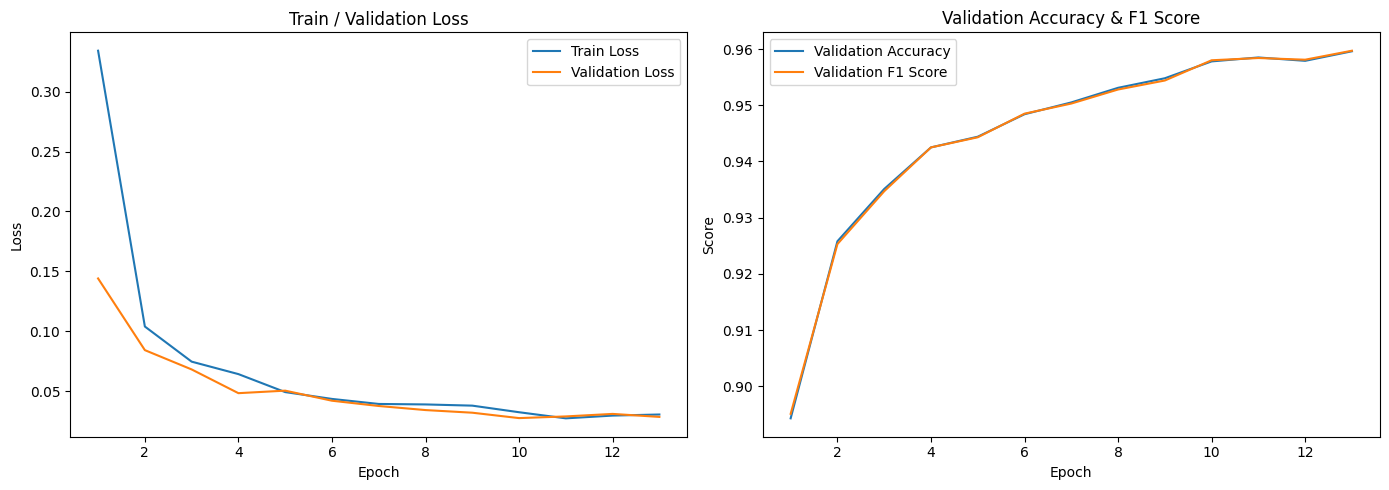

In [3]:
import matplotlib.pyplot as plt

# Donn√©es extraites des logs fournis
epochs = list(range(1, 14))
train_loss = [0.3341, 0.1040, 0.0747, 0.0643, 0.0493, 0.0436, 0.0394, 0.0390, 0.0380, 0.0325, 0.0274, 0.0297, 0.0306]
val_loss = [0.1441, 0.0843, 0.0682, 0.0484, 0.0505, 0.0421, 0.0377, 0.0343, 0.0321, 0.0276, 0.0290, 0.0311, 0.0286]
val_acc = [0.8943, 0.9258, 0.9351, 0.9425, 0.9444, 0.9484, 0.9505, 0.9531, 0.9548, 0.9578, 0.9585, 0.9579, 0.9596]
val_f1 = [0.8951, 0.9253, 0.9347, 0.9425, 0.9443, 0.9485, 0.9503, 0.9528, 0.9544, 0.9580, 0.9584, 0.9581, 0.9597]

plt.figure(figsize=(14, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train / Validation Loss')
plt.legend()

# Plot Accuracy & F1
plt.subplot(1, 2, 2)
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.plot(epochs, val_f1, label='Validation F1 Score')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Validation Accuracy & F1 Score')
plt.legend()

plt.tight_layout()
plt.show()


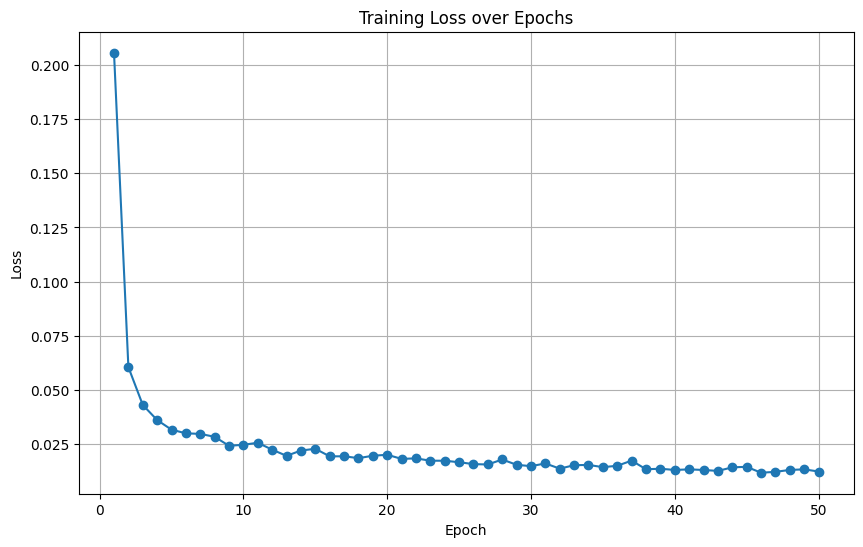

In [12]:
import matplotlib.pyplot as plt

# Ta liste de loss extraite du training (copie-colle les valeurs)
loss_values = [
    0.2057676060056245,
    0.06045342772883713,
    0.04298879926600469,
    0.03600318706224835,
    0.03154912354454162,
    0.02987239439355791,
    0.02960584346678049,
    0.028260034075371487,
    0.024097349903689176,
    0.024572632566252084,
    0.02550538288301261,
    0.02230499789276451,
    0.01946399265299083,
    0.021904763519251472,
    0.022726599651847094,
    0.01922706384753818,
    0.019253774762902624,
    0.018397813357373394,
    0.01950212782150302,
    0.019956535886401536,
    0.018058929883101316,
    0.018292332962451,
    0.017217028378533623,
    0.01719724869345704,
    0.016511536964644042,
    0.015642024552025808,
    0.015459948352405004,
    0.017773348367501978,
    0.015319379406276519,
    0.014696063998613566,
    0.015950198006870413,
    0.013546578640305491,
    0.015130034226569392,
    0.01526462918679629,
    0.014231864847095004,
    0.014863649400434008,
    0.017255737155518203,
    0.013262989134995868,
    0.013497435751435145,
    0.012941343032276977,
    0.013211758087867152,
    0.012925717533718814,
    0.012497370794080394,
    0.014144528977494075,
    0.014390987319448007,
    0.0116593041334045,
    0.01206262982647531,
    0.012953781248094938,
    0.013207521922787818,
    0.012223270135345283
]

epochs = list(range(1, len(loss_values) + 1))

plt.figure(figsize=(10,6))
plt.plot(epochs, loss_values, marker='o')
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


In [8]:
import torch

# Sauvegarder le mod√®le apr√®s l'entra√Ænement
def save_model(model, model_path):
    # Sauvegarde uniquement l'√©tat du mod√®le
    torch.save(model.state_dict(), model_path)
    print(f"‚úÖ Mod√®le sauvegard√© √† {model_path}")

# Exemple d'utilisation apr√®s l'entra√Ænement
save_model(model, "/content/drive_new/MyDrive/diffusion_emotion_recognition_model.pth")


‚úÖ Mod√®le sauvegard√© √† /content/drive_new/MyDrive/diffusion_emotion_recognition_model.pth


In [15]:
import os
import torch
import pandas as pd
from ast import literal_eval
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import librosa.display

# (Reprends ici la d√©finition compl√®te de DiffusionUNet, SinusoidalPositionEmbeddings, ResNetBlock, ConditionProjector,
# forward_diffusion_sample, make_beta_schedule, reverse_diffusion_sample, denormalize, save_generated_mels, load_data, etc.
# (tout ce que tu as d√©j√† d√©fini pr√©c√©demment)
# N'oublie pas de d√©finir toutes ces fonctions/classes avant ce script.

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparam√®tres
T = 1000
betas = make_beta_schedule(T).to(device)

# Instancier mod√®le
model = DiffusionUNet(cond_dim=768, mel_style_dim=128, emotion_dim=2048, time_emb_dim=128).to(device)

# Charger poids sauvegard√©s (chemin √† adapter)
model.load_state_dict(torch.load("/content/drive_new/MyDrive/diffusion_emotion_recognition_model.pth", map_location=device))
model.eval()

# Charger les donn√©es (mel spectrograms + conditions)
mel_spectrograms, mel_style_vectors, text_embeddings, emotion_vectors = load_data(
    mel_style_csv='/content/drive_new/MyDrive/mel_style_vectors_text_embedded.csv',
    emotion_csv='/content/drive_new/MyDrive/emotion_vectors.csv',
    mel_spectrogram_dir='/content/drive_new/MyDrive/MelSpectrograms_MERGED_ONE',
    save_tensors=False  # pas besoin de sauvegarder encore ici
)


In [16]:
import torch.nn.functional as F

def evaluate_model(model, mel_spectrograms, mel_style_vectors, text_embeddings, emotion_vectors, betas, T, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for i in range(len(mel_spectrograms)):
            x0 = mel_spectrograms[i].unsqueeze(0).to(device)
            mel_style = mel_style_vectors[i].unsqueeze(0).to(device)
            text_emb = text_embeddings[i].unsqueeze(0).to(device)
            emotion = emotion_vectors[i].unsqueeze(0).to(device)

            t = torch.randint(0, T, (1,), device=device)
            x_t, noise = forward_diffusion_sample(x0, t, betas)

            predicted_noise = model(x_t, t, mel_style, text_emb, emotion, reverse_phase=False)
            loss = F.mse_loss(predicted_noise, noise)
            total_loss += loss.item()
    avg_loss = total_loss / len(mel_spectrograms)
    print(f"Average MSE loss on dataset: {avg_loss:.6f}")

# Appel
evaluate_model(model, mel_spectrograms, mel_style_vectors, text_embeddings, emotion_vectors, betas, T, device)


Average MSE loss on dataset: 0.014204


###Modelisation inverse

In [19]:
output_dir = "/content/drive_new/MyDrive/Generated"
emotion_labels = ["angry", "happy", "sad", "disgust", "neutral", "fear"]

def save_generated_mels(generated_mels, output_dir, base_name="generated_mel", save_format="pt"):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i, mel in enumerate(generated_mels):
        mel = denormalize(mel)  # d√©normalisation

        if save_format == "pt":
            torch.save(mel.squeeze(0), os.path.join(output_dir, f"{base_name}_{i}.pt"))
        elif save_format == "png":
            mel_db = mel.cpu().numpy()
            # Enlever les dimensions batch et channel
            while mel_db.ndim > 2:
                mel_db = mel_db.squeeze(0)
            if mel_db.ndim != 2:
                raise ValueError(f"Shape incorrect du mel spectrogramme pour affichage: {mel_db.shape}")

            plt.figure(figsize=(10, 4))
            librosa.display.specshow(mel_db, sr=22050, hop_length=256, x_axis='time', y_axis='mel', cmap='magma')
            plt.colorbar(label='Amplitude')
            plt.tight_layout()
            plt.savefig(os.path.join(output_dir, f"{base_name}_{i}.png"))
            plt.close()


for i, emotion in enumerate(emotion_labels):
    x_t = torch.randn((1, 1, 80, 861), device=device)
    mel_style_sample = mel_style_vectors[i % len(mel_style_vectors)].unsqueeze(0).to(device)
    text_emb_sample = text_embeddings[i % len(text_embeddings)].unsqueeze(0).to(device)
    emotion_sample = emotion_vectors[i % len(emotion_vectors)].unsqueeze(0).to(device)

    generated_mel = reverse_diffusion_sample(
        model, x_t, T, mel_style_sample, text_emb_sample, emotion_sample, betas, T, device
    )
    save_generated_mels([generated_mel], output_dir, base_name=f"mel_{emotion}", save_format="png")

print(f"‚úÖ Toutes les m√©l-spectrogrammes g√©n√©r√©s sont enregistr√©s dans {output_dir}")


‚úÖ Toutes les m√©l-spectrogrammes g√©n√©r√©s sont enregistr√©s dans /content/drive_new/MyDrive/Generated


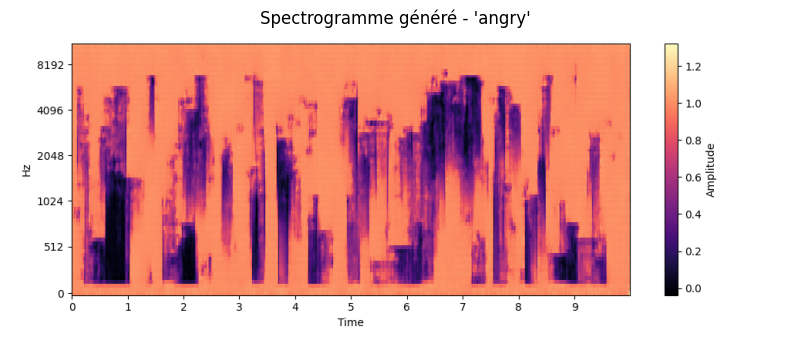

In [20]:
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import os
from PIL import Image

# Chemin du fichier image (png) g√©n√©r√©, exemple premier spectrogramme 'angry'
file_to_display = "/content/drive_new/MyDrive/Generated/mel_angry_0.png"

# Affichage avec matplotlib
img = Image.open(file_to_display)
plt.figure(figsize=(10, 4))
plt.imshow(img)
plt.axis('off')  # cacher les axes
plt.title("Spectrogramme g√©n√©r√© - 'angry'")
plt.show()


comparaison

In [21]:
import os
import matplotlib.pyplot as plt
import librosa.display

def denormalize(mel):
    return mel * 0.5 + 0.5  # Inversion normalisation

def save_spectrogram(mel_tensor, filepath, sr=22050, hop_length=256, title=None):
    mel_np = denormalize(mel_tensor).cpu().squeeze().numpy()
    # S'assurer que mel_np est 2D
    while mel_np.ndim > 2:
        mel_np = mel_np.squeeze(0)
    if mel_np.ndim != 2:
        raise ValueError(f"Spectrogramme √† sauvegarder doit √™tre 2D, shape={mel_np.shape}")

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_np, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel', cmap='magma')
    if title:
        plt.title(title)
    plt.colorbar(label='Amplitude')
    plt.tight_layout()
    plt.savefig(filepath)
    plt.close()

output_dir = "/content/drive_new/MyDrive/Generated_Comparison"
os.makedirs(output_dir, exist_ok=True)

for i, emotion in enumerate(emotion_labels):
    print(f"Processing emotion: {emotion}")
    x_t = torch.randn((1, 1, 80, 861), device=device)
    mel_style_sample = mel_style_vectors[i % len(mel_style_vectors)].unsqueeze(0).to(device)
    text_emb_sample = text_embeddings[i % len(text_embeddings)].unsqueeze(0).to(device)
    emotion_sample = emotion_vectors[i % len(emotion_vectors)].unsqueeze(0).to(device)

    # Diffusion inverse
    generated_mel = reverse_diffusion_sample(
        model, x_t, T, mel_style_sample, text_emb_sample, emotion_sample, betas, T, device
    )

    # Sauvegarde spectrogrammes
    noisy_path = os.path.join(output_dir, f"noisy_{emotion}.png")
    generated_path = os.path.join(output_dir, f"generated_{emotion}.png")

    save_spectrogram(x_t, noisy_path, title=f"Spectrogramme Bruit√© - {emotion}")
    save_spectrogram(generated_mel, generated_path, title=f"Spectrogramme G√©n√©r√© - {emotion}")

print(f"‚úÖ Tous les spectrogrammes (bruit√© + g√©n√©r√©) sont sauvegard√©s dans {output_dir}")


Processing emotion: angry
Processing emotion: happy
Processing emotion: sad
Processing emotion: disgust
Processing emotion: neutral
Processing emotion: fear
‚úÖ Tous les spectrogrammes (bruit√© + g√©n√©r√©) sont sauvegard√©s dans /content/drive_new/MyDrive/Generated_Comparison


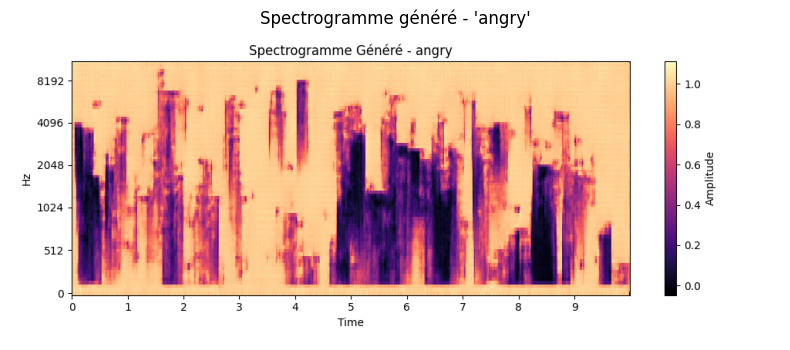

In [22]:
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import os
from PIL import Image

# Chemin du fichier image (png) g√©n√©r√©, exemple premier spectrogramme 'angry'
file_to_display = "/content/drive_new/MyDrive/Generated_Comparison/generated_angry.png"

# Affichage avec matplotlib
img = Image.open(file_to_display)
plt.figure(figsize=(10, 4))
plt.imshow(img)
plt.axis('off')  # cacher les axes
plt.title("Spectrogramme g√©n√©r√© - 'angry'")
plt.show()


In [6]:
from google.colab import drive
drive.mount('/content/drive_new')

Mounted at /content/drive_new


# Evaluation

##Comparaison visuelle des spectrogrammes avant et apr√®s diffusion montrant une r√©duction du bruit tout en conservant les caract√©ristiques cl√©s de l‚Äô√©motion exprim√©e.

| **Crit√®res d‚Äô√©valuation**          | **Spectrogramme Avant Diffusion**                     | **Spectrogramme Apr√®s Diffusion**                       | **Observations**                                               |
| ---------------------------------- | ----------------------------------------------------- | ------------------------------------------------------- | -------------------------------------------------------------- |
| **Structure fr√©quentielle**        | Pics fr√©quentiels nets et marqu√©s                     | Pics fr√©quentiels conserv√©s mais l√©g√®rement plus liss√©s | Lissage l√©ger, typique d‚Äôune r√©duction de bruit                |
| **Niveau de bruit**                | Bruit pr√©sent dans certaines zones                    | Bruit r√©duit, spectrogramme plus propre                 | Am√©lioration de la clart√© gr√¢ce au processus de diffusion      |
| **Caract√©ristiques √©motionnelles** | Caract√©ristiques distinctes li√©es √† l‚Äô√©motion "angry" | Caract√©ristiques √©motionnelles globalement pr√©serv√©es   | Le mod√®le conserve les √©l√©ments cl√©s d‚Äôexpression √©motionnelle |
| **Qualit√© visuelle g√©n√©rale**      | Image plus ¬´ brute ¬ª, bruit√©e                         | Image plus lisse et √©pur√©e                              | Processus de g√©n√©ration qui am√©liore l‚Äôesth√©tique              |


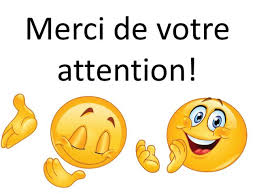